# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [1]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [4]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
pip install tweepy==4.12.1

  Using cached tweepy-4.12.1-py3-none-any.whl (101 kB)
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
print (tweepy.__version__)

4.13.0


## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [ ]:
# Collect tweets
#query = "Qatar" + "#MUFC" +  " -filter:retweets" 
#cutoff_date = "2023-03-02" 
searchTerms = "(Qatar AND #MUFC) OR #glazers OR #GlazersSellManUtd OR #QatarIn OR #GlazersOutNow" + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=searchTerms, lang="en", tweet_mode = 'extended' ).items(1500)

tweets_list = [[tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]

tweets_df = pd.DataFrame(data=tweets_list, columns=['date', 'user', 'location', 'text'])

# A good idea to save downloaded tweets as CSV
tweets_df.to_csv ('current_set.csv', quotechar='"', encoding='utf8', index = False, header=True)

KeyboardInterrupt: ignored

In [ ]:
# Display the dataset
df = pd.read_csv("current_set.csv")
df

date             user                  location  \
0     2023-03-07 12:48:11+00:00      RedCentrall            United Kingdom   
1     2023-03-07 12:40:57+00:00     shineparamel                     India   
2     2023-03-07 12:40:40+00:00     shineparamel                     India   
3     2023-03-07 12:40:20+00:00     shineparamel                     India   
4     2023-03-07 12:37:28+00:00  Telling88622197                       NaN   
...                         ...              ...                       ...   
1495  2023-03-03 21:58:56+00:00         bubble72                  Tamworth   
1496  2023-03-03 21:57:20+00:00      LBardsley44       Manchester, England   
1497  2023-03-03 21:52:37+00:00  mufc7Glazersout   England, United Kingdom   
1498  2023-03-03 21:45:56+00:00       vergiilyes                         🕋   
1499  2023-03-03 21:44:27+00:00     davidstrikee  Scotland, United Kingdom   

                                                   text  
0     🚨🚨| Ten Hag has also put Ajax attacker Mohamme...  
1     @AlSupersport Again the time and moment is sho...  
2     @gazelliott2 Again the time and moment is show...  
3     Again the time and moment is shown for #QatarI...  
4     @AnfieldEdition @LivEchoLFC Meaning no funds @...  
...                                                 ...  
1495  @Qatari Now fair play you put your head on the...  
1496  @UnitedStandMUFC @markgoldbridge Get the glaze...  
1497  @YoungArab61 @Richard20049325 Out, out, out! #...  
1498  @TransfersIntel @AdamCrafton_ @BBCSport #Qatar...  
1499  I'LL SECOND THAT MOTION JAMES 👍&amp; OSHIMEN W...  

[1500 rows x 4 columns]

# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [ ]:
# # Importing essential libraries
# import nltk
# import string
# from nltk.tokenize import TweetTokenizer
# from nltk.corpus import stopwords
# import re


# # Load the dataset
# tweets_text = pd.read_csv('datasetNLP.csv', quotechar='"', encoding='utf8')
# tweets_text

# # make a list to store the pre-processed tweets
# tweets_list = []

# # Remove stop words
# sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
# my_stop_words=stopwords.words('english')
# my_stop_words.extend(sw_list)

# for tweets in tweets_text['text']:
#     # Lowercase words
#     tweets = tweets.lower()
#     # Remove punctuation
#     no_punc_text=tweets.translate(str.maketrans('','',string.punctuation))
#     # Remove urls
#     no_url_text=re.sub(r'http\S+', '', no_punc_text)
#     # Tokenisation
#     tknzr = TweetTokenizer(strip_handles=True)
#     tweets_tokens=tknzr.tokenize(no_url_text)
#     no_stop_tokens=[word for word in tweets_tokens if not word in my_stop_words]
#     tweets_tokens_joined=' '.join(no_stop_tokens)
#     tweets_list.append(tweets_tokens_joined)
# print(tweets_list)

In [7]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('current_set.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
#print(tweets_df['text_processed'].head()

# Removing duplicate tweets
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)
#tweets_df

[' ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev', 'even in bad days we go back erik ten hag my manager mufc tmy2ejvufu', 'ten hag ready to make top transfer targets dream come true the athletic mufc glazersout tgez7heqeh', 'still pssed off about the scouse scum sack bruno sack ten hagsick of itglazersoutnow mufc', 'just incase you keyboard warriors out there have forgottenklopp 1st season 51 games 22 wins zero trophies 8th place finish in pleth first season so far 42 games 30 wins 1 trophystill in fa cup uel last 163rd in pltrust the process manutd mufc', 'selling two home tickets for manchester united v real betis message me for more information manchesterunitedtickets manunited manunitedtickets mufcspares mufc', '2x man united v betis tickets available for sale dm for more details mufc mufc manchesterunited manunited mufc_family mufctickets', 'ten hags brentford an

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

In [9]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-macosx_10_9_x86_64.whl (160 kB)
Note: you may need to restart the kernel to use updated packages.


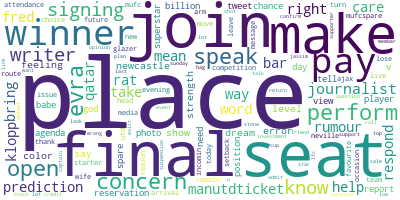

In [10]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Topic Modelling

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Do you want to modify this by adding more stop words?
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) 
    if word not in stop_words] for doc in texts]


data = tweets_df.text_processed.values.tolist()

data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

# create a dictionary
id2word = corpora.Dictionary(data_words)

# create a corpus
texts = data_words

# convert the corpus into a BoW representation
corpus = [id2word.doc2bow(text) for text in texts]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pprint import pprint

# set number of topics
num_topics = 5

# build an LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# print keywords in each topic
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# visualise the topics
!pip install pyldavis

In [ ]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
  pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
  LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

# Sentiment Analysis

This implementation is based on the lexicon- and rule-based [VADER](https://github.com/cjhutto/vaderSentiment) sentiment analysis tool.

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

for tweet_text in unique_tweets:
    vs = analyzer.polarity_scores(tweet_text)
    print(tweet_text + '\t' + str(vs))

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [11]:
#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf
import spacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


In [12]:
for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])


 ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev
	NE found:  7 12 CARDINAL seven
	NE found:  25 39 PERSON mike amp keith
	NE found:  48 51 ORG lfc
	NE found:  58 62 ORG mufc
	NE found:  89 92 ORG mci
	NE found:  110 125 ORG championsleague
even in bad days we go back erik ten hag my manager mufc tmy2ejvufu
ten hag ready to make top transfer targets dream come true the athletic mufc glazersout tgez7heqeh
	NE found:  0 7 PERSON ten hag
	NE found:  72 76 ORG mufc
still pssed off about the scouse scum sack bruno sack ten hagsick of itglazersoutnow mufc
just incase you keyboard warriors out there have forgottenklopp 1st season 51 games 22 wins zero trophies 8th place finish in pleth first season so far 42 games 30 wins 1 trophystill in fa cup uel last 163rd in pltrust the process manutd mufc
	NE found:  49 63 ORG forgottenklopp
	NE found:  64 74 DATE 1st season
	NE found:  7

manchester united transfer target victor osimhen has confirmed that he has aspirations to play in the premier league the napoli striker was identified as a player of interest to the reds last yearmufc gx6b6davuq
	NE found:  0 17 ORG manchester united
	NE found:  34 48 PERSON victor osimhen
	NE found:  98 116 ORG the premier league
	NE found:  121 127 ORG napoli
	NE found:  182 186 ORG reds
	NE found:  187 200 DATE last yearmufc
centredevils another player who plays on the left side of attack makes perfect sense erik mufc
	NE found:  0 12 PERSON centredevils
	NE found:  85 94 PERSON erik mufc
44m man utd star suffered injury vs liverpool doubtful for thursday report reddevils mufcfamily mufc f15jpiydgo
	NE found:  0 2 NORP 44
	NE found:  36 45 ORG liverpool
	NE found:  59 67 DATE thursday
	NE found:  75 84 ORG reddevils
	NE found:  85 95 ORG mufcfamily
cotterill_david youre a compulsive liar and havent a clue about the clubs fanbase you clearly havent been to or watched a united match i

match preview united v real betis mufc glazersout vvetfmzzhj
	NE found:  14 20 ORG united
simon jordan believes bruno fernandes should face punishment for pushing linesman mufc vu2parz8x
	NE found:  0 12 PERSON simon jordan
	NE found:  22 37 PERSON bruno fernandes
southampton singles amp pairs fulham pairsbetispair amp single all available message me for info mufc mufctickets mufcspare mufc mufctickets
	NE found:  0 11 GPE southampton
	NE found:  30 36 PERSON fulham
harry kane in may 2024 mufc t9ov7gqmww
	NE found:  0 10 PERSON harry kane
	NE found:  14 22 DATE may 2024
anyone interested in 2x tickets for manchester united v betis game dm im selling mine mufctickets mufc mufcspares manchesterunited manchester_united
	NE found:  36 55 ORG manchester united v
	NE found:  86 97 ORG mufctickets
	NE found:  114 130 ORG manchesterunited
mufc are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champion

 casemiro is one booking away from a european suspensionmufc manutd
	NE found:  1 9 PERSON casemiro
	NE found:  13 16 CARDINAL one
	NE found:  37 45 NORP european
mufc jude bellingham response spotted after liverpool thrash man utd at anfield the mirror hajf7za963
	NE found:  5 20 PERSON jude bellingham
	NE found:  44 53 GPE liverpool
	NE found:  65 68 PERSON utd
rr loanwatch fixtures19 45 barnsley vs portsmouth bernardgrimsby vs newport mcneillscunthorpe vs altrincham oyedelemufc
	NE found:  24 26 CARDINAL 45
	NE found:  27 35 GPE barnsley
	NE found:  39 64 ORG portsmouth bernardgrimsby
	NE found:  68 93 ORG newport mcneillscunthorpe
	NE found:  97 119 ORG altrincham oyedelemufc
victorosimhen9 was born to be a red look how perfect this kit looks on himmufc glazersout asmsdqynxr
	NE found:  0 14 PERSON victorosimhen9
	NE found:  71 78 ORG himmufc
bruno is one of the best player this sznall this hate cause neville the glazers lap dog liedbut no word said about a gk that let 7 goals in f

new episode gtfc loss poor decision making wasted chance in the facup lcfc win jwp penalty dilemma carlos alcaraz magic mufc preview saintsfch_tizard mike_maidment jamie_allan665listen now azoyrxampb
	NE found:  12 16 ORG gtfc
	NE found:  64 69 ORG facup
	NE found:  70 74 ORG lcfc
	NE found:  79 82 ORG jwp
regardless or what anyone thinks about bruno in terms of the captaincy dressing rooms leaks is a fcking jokei back bruno here no time for he deserves loyalty off his team matesweed em out and fuck em off mufc
	NE found:  39 44 PERSON bruno
	NE found:  115 120 PERSON bruno
utdplug wout werghorst can leave hes simply not good enough for the club with only one goal in very many games playedmufc
	NE found:  0 22 PERSON utdplug wout werghorst
	NE found:  83 86 CARDINAL one
its time we all moved on from the liverpool result i was angry and overreacted eth the players and staff have done a good job so farone crap result shouldnt stop us forgetting what they have achieved lets hope we get to

 new newcastle are understood to be monitoring harry maguires situation a number of premier league clubs are interested in the mufc captain graemebailey 
	NE found:  5 14 ORG newcastle
	NE found:  47 61 PERSON harry maguires
	NE found:  84 98 ORG premier league
	NE found:  127 131 ORG mufc
	NE found:  140 152 PERSON graemebailey
deadlinedaylive speakin on the behalf of eth like he fuckin cares oh man do you even know about the system we play these days the only guy were gutted for is the nigerian king mufc sia5mzwvnf
	NE found:  41 44 PERSON eth
	NE found:  115 125 DATE these days
	NE found:  162 170 NORP nigerian
 ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed kudus for ajax in 2020 and has continued to track his progress alex_crook ggiackyuh4
	NE found:  1 8 PERSON ten hag
	NE found:  17 31 PERSON mohammed kudus
	NE found:  47 53 DATE summer
	NE found:  66 70 ORG mufc
	NE found:  71 78 PERSON ten hag
	NE found:  86 91 PERSON kudus
	NE found:  96 

manchester united since the world cupjust 2 defeats in 21 with wins against man city barca and newcastletime to get back to winning ways mufc 9tkblxhd00
	NE found:  0 17 ORG manchester united
	NE found:  24 41 EVENT the world cupjust
	NE found:  42 43 CARDINAL 2
	NE found:  55 57 CARDINAL 21
	NE found:  76 90 ORG man city barca
	NE found:  95 108 ORG newcastletime
	NE found:  137 141 ORG mufc
there is a lot of agenda driven criticism of bruno on here especially from some mufc supporters yes he was abysmal i criticised him after the match too but no need to get personal stop it now support him support the team on thursday
	NE found:  45 50 PERSON bruno
	NE found:  80 84 ORG mufc
	NE found:  224 232 DATE thursday
the premier league would be a dream move cfc mufcl4lh54qjrl
	NE found:  0 18 ORG the premier league
	NE found:  41 44 ORG cfc
 new there are obvious reasons for harry kane attraction from mufc but my understanding is that ideally united would like a younger dynamic profile there

23 day of tweeting until i get alejangro garnacho signed shirt our magic young talent agarnacho7manutdmufc manutd garnacho
	NE found:  0 6 DATE 23 day
	NE found:  31 49 PERSON alejangro garnacho
	NE found:  107 122 PERSON manutd garnacho
my thoughts regarding mufc today1 b_fernandes8 is my captain and i love how opponents hate him2 i love manutdsquad3 eth will turn this around again
	NE found:  22 26 ORG mufc
	NE found:  116 119 PERSON eth
the reasons everyone hates bruno are the reasons i love him hes a fucking shithouse unacceptable performancebehaviour at anfield especially as captain but hes still our magnifico mufc 96s1ds5u7z
	NE found:  27 32 PERSON bruno
	NE found:  121 128 ORG anfield
fair play to alejandro garnacho for fronting up and apologising for sundays events at anfield the manchester united youngster is one of only a handful of players to have taken to social media sincemufc 8sewtbhvdp
	NE found:  13 31 PERSON alejandro garnacho
	NE found:  68 75 DATE sundays
	NE found:

utdharryy the games come soo thick and fast these days its easy to move on as theres always another game to rectify things cant cry over spilt milk mufc
	NE found:  0 9 PERSON utdharryy
	NE found:  44 54 DATE these days
for anyone still thinking betis away easyjet gatwick return flight to faro about 125bus fares alsa and flixbus about 45bus is about 25 hourseuroaways mufc
	NE found:  26 31 GPE betis
	NE found:  37 52 ORG easyjet gatwick
	NE found:  70 74 GPE faro
	NE found:  75 87 CARDINAL about 125bus
	NE found:  94 98 ORG alsa
	NE found:  103 110 ORG flixbus
	NE found:  111 122 CARDINAL about 45bus
	NE found:  126 134 CARDINAL about 25
	NE found:  150 154 ORG mufc
ive ignored all the hysteria over the loss and spent less time on twitter because its toxic i cant believe 2days later fans are wasting energy debating whether bruno asked to be subbed which he clearly didntgive it a rest real betis on thursday we go again mufc
	NE found:  107 118 DATE 2days later
	NE found:  160 165 PERSON

 new newcastle are understood to be monitoring harry maguires situation a number of premier league clubs are interested in the mufc captain graemebailey
	NE found:  5 14 ORG newcastle
	NE found:  47 61 PERSON harry maguires
	NE found:  84 98 ORG premier league
	NE found:  127 131 ORG mufc
	NE found:  140 152 PERSON graemebailey
 melissareddy_ theres obvious reasons for harry kane attraction from mufc not least rekindling the offensive chemistry with christian eriksen but my understanding is that ideally united would like a younger dynamic profile there as first prize like osimhen sky
	NE found:  1 13 PERSON melissareddy
	NE found:  42 52 PERSON harry kane
	NE found:  69 73 ORG mufc
	NE found:  124 141 PERSON christian eriksen
	NE found:  179 185 ORG united
	NE found:  232 237 ORDINAL first
	NE found:  249 260 PERSON osimhen sky
weghorst touching this is anfield signmufc cnpvxcrwl6
	NE found:  26 42 PERSON anfield signmufc
day 21 of tweeting and kindly asking until i get a luke shaw sig

 having focused so heavily on recruiting and keeping the right characters at united cultivating a culture of collective responsibility ten hag was stunned at the senior pros the reference points abdicating their duties melissareddy_ mufc
	NE found:  77 83 ORG united
	NE found:  135 142 PERSON ten hag
	NE found:  219 231 PERSON melissareddy
you must not have seen my dalot tweets mufc bpgdfaaxv1
good morning manchester united fans were all dortmund tonight mufc
	NE found:  0 12 TIME good morning
	NE found:  13 30 ORG manchester united
	NE found:  45 53 GPE dortmund
	NE found:  54 61 TIME tonight
 sheikh jassim watched manchester uniteds 70 loss to liverpool on tv and still wants to buy the club skykaveh 7 mufc mufclatest
	NE found:  1 14 PERSON sheikh jassim
	NE found:  23 41 ORG manchester uniteds
	NE found:  42 44 CARDINAL 70
	NE found:  53 62 GPE liverpool
	NE found:  101 109 ORG skykaveh
mufcwonitall cotterill_david glazersout were sung at wembley before and after scoring goal but th

1x ticket available for real betis fulham amp brentford at old trafford to be sold together contact halimabegum08 mufc
	NE found:  29 41 PERSON betis fulham
	NE found:  46 55 PERSON brentford
article a bad unprofessional performance erik ten hag says after 70 demolition against liverpool by martin graham mufc united lfc ynwa 
	NE found:  41 53 PERSON erik ten hag
	NE found:  65 67 CARDINAL 70
	NE found:  87 96 GPE liverpool
	NE found:  100 113 PERSON martin graham
	NE found:  114 118 ORG mufc
	NE found:  119 129 ORG united lfc
why the fook is weghorst touching the liverpool badgeno wonder we lost 70 mufc pxxt9a5hkt
	NE found:  16 24 PERSON weghorst
	NE found:  38 47 GPE liverpool
	NE found:  48 55 GPE badgeno
	NE found:  71 73 CARDINAL 70
you say dem score us 70 and you are saying what we have a score to settle bruh mufc xdxtkhyrj0
	NE found:  21 23 CARDINAL 70
centredevils this guy is uselesscant head a ball to save his lifeslow as a cart horsetwo left legscant hit a barn doorbut hes 

 id rather you scream and shout at me to be honestkenny cunningham chimes in on the news that erik ten hag forced the mufc players to sit in silence after the liverpoolfc defeat gilletteuk effortlessflowlisten here snhmfncsqh
	NE found:  44 66 PERSON honestkenny cunningham
	NE found:  94 106 PERSON erik ten hag
	NE found:  118 122 ORG mufc
	NE found:  159 170 ORG liverpoolfc
	NE found:  178 188 GPE gilletteuk
someone tell me this is photoshopped i can take the 70just i couldnt take one of ours doing this mufc hdjv8myajv
manutdmen casemiro is our captain mufc
	NE found:  10 18 PERSON casemiro
	NE found:  34 38 PERSON mufc
day 22 of tweeting agarnacho7 until i get a signed shirt from mystarboy garnacho mufc wfvz5brpgf
	NE found:  0 6 DATE day 22
what the liverpool defeat should do however is convince manchester united even more that they have listen to erik ten hag jburttelegraphtelegraphfootball i mufc
	NE found:  9 18 GPE liverpool
	NE found:  56 73 ORG manchester united
	NE found:  10

ten hag admitted he couldnt properly explain what happened when the teams returned to the pitch and as one visiting players agent put it united lost their heads legs and cajones melissareddy_ mufc
	NE found:  0 7 PERSON ten hag
	NE found:  103 106 CARDINAL one
	NE found:  137 143 ORG united
 ten hag will not allow the tired united narrative to take hold in the two training sessions following the late exacting victory over west ham manchester united had lacked zip which was concerning melissareddy_ mufc 
	NE found:  1 8 ORG ten hag
	NE found:  34 40 ORG united
	NE found:  71 74 CARDINAL two
	NE found:  134 160 ORG west ham manchester united
	NE found:  197 209 PERSON melissareddy
mistashellshock the love for mufc this is what it means to support this hugeass clubrivals doing the most dnt get it twisted all the neg stories root mostly from rivals
	NE found:  0 15 PERSON mistashellshock
	NE found:  29 33 ORG mufc
	NE found:  133 136 ORG neg
my captain mufc 1sxl5zgamp
	NE found:  11 26 PER

this tells me how good he has been this season one very bad performance and everyone is coming after him it was frustrating on sunday but i think we will bounce backbelieve in ten hagmufcggmu 5kcrysvupj
	NE found:  35 46 DATE this season
	NE found:  47 50 CARDINAL one
	NE found:  127 133 DATE sunday
still plenty of tickets left after being available to 1 euro credit holders at 10 am this morning will go on sale to zero credits either later today or tomorrow club will announce further update later today mufc tw59en5aog
	NE found:  54 60 MONEY 1 euro
	NE found:  79 84 TIME 10 am
	NE found:  117 121 CARDINAL zero
	NE found:  143 148 DATE today
	NE found:  152 160 DATE tomorrow
	NE found:  195 206 TIME later today
 manchester united are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champions league football mufcalex_crook via talksport 7ypjwdbcy8
	NE found:  1 18 ORG manchester united
	NE found:  

casey_evans_ yes that is true but that isnt my point depending on how eth envisions mufcs press in the near future using lisandro how arsenal intended on using him could be beneficial both routes have tradeoffs and that too must be said
	NE found:  0 11 PERSON casey_evans
	NE found:  70 73 ORG eth
	NE found:  84 89 ORG mufcs
	NE found:  121 129 PERSON lisandro
	NE found:  134 141 ORG arsenal
thoughts on this mufc n0gsfgu3yg
well they did us a solid women saving lives since irene sendler thanks manutdwomen mufc 17xqps1ukm
	NE found:  50 63 PERSON irene sendler
united youngsters kobbie mainoo and zidane iqbal have bright futures mufc fcu8jpzlwk
	NE found:  0 6 ORG united
	NE found:  18 31 PERSON kobbie mainoo
	NE found:  36 48 PERSON zidane iqbal
	NE found:  69 73 ORG mufc
bruno fernandes is one of the top signing post fergie not everyone is perfect with their reaction when they lose bruno hate to lose not sure all the manutd players does as much as him mufc
	NE found:  0 15 PERSON bruno

man utd players fuming at bruno fernandes and his dream of becoming captain looks set to be over mufc manutd 7zrlpqfeij
	NE found:  4 7 ORG utd
	NE found:  26 41 PERSON bruno fernandes
	NE found:  97 101 ORG mufc
	NE found:  102 108 ORG manutd
arsenal fans need to br very careful if they bottle the title and dont win the europa they could end up with a worse season than united especially if we win another trophy and that would be comical mufc
	NE found:  0 7 NORP arsenal
	NE found:  79 85 ORG europa
	NE found:  129 135 ORG united
	NE found:  198 202 ORG mufc
looking forward to betiscant wait to see the angerpassion in the performancethe players and manager like us will be hurting this needs to show on thursdaydominance mufc munbet uel
	NE found:  65 79 ORG performancethe
	NE found:  146 163 DATE thursdaydominance
tom cleverley i felt like a failure doing it and its a bit of a crazy way to think playing for united and england but at the time i was playing poorly and it was really the st

unitedreal betis europa league thursday 2000 gmt old trafford bt sport 1 bt sport ultimatemufc buuuadxyvu
	NE found:  0 16 ORG unitedreal betis
	NE found:  17 30 ORG europa league
	NE found:  31 48 DATE thursday 2000 gmt
tenhagway manutd why did ten hag play shaw varane and casemiro when he perfectly knew they were unfit to start the game mufc livmun
	NE found:  0 16 PERSON tenhagway manutd
	NE found:  25 32 ORG ten hag
	NE found:  38 49 PERSON shaw varane
	NE found:  54 62 PERSON casemiro
	NE found:  120 131 PERSON mufc livmun
if you could sign one cf out of these for mufc who would it be
	NE found:  18 21 CARDINAL one
alejandro garnacho has taken to social media to apologise for sundays defeat to liverpool mufc nl9zv0cqli
	NE found:  0 18 PERSON alejandro garnacho
	NE found:  62 69 DATE sundays
	NE found:  80 89 GPE liverpool
do you remember when you joined twitter i do mytwitteranniversary ggmu mufc mufc_family 6x6bon7umj
	NE found:  32 39 ORG twitter
sheikh jassim bin hamad al than

with big thanks to johngibbonsblog theanfieldwrap and mrstephenhowson stretfordpaddck for their insight and especially to philmcnulty and jimw1 whose book on the rivalry red on red is outstanding lfc mufc 5iympb6eam
	NE found:  19 34 PERSON johngibbonsblog
	NE found:  54 85 PERSON mrstephenhowson stretfordpaddck
	NE found:  122 133 PERSON philmcnulty
	NE found:  138 143 PERSON jimw1
stephgodfrey88 sure is lots of the younger fans who really do not have any patience wanting things that quite clearly are not going to happen manchester is red always will be win lose or draw its united 4eva more mufc
	NE found:  0 14 PERSON stephgodfrey88
	NE found:  142 152 ORG manchester
	NE found:  156 159 NORP red
	NE found:  213 217 ORG mufc
luke shaws 50 yard run mufc y96olbjelt
	NE found:  0 4 PERSON luke
	NE found:  11 13 CARDINAL 50
mufc fans should be in government the amount of spin they have put on being crushed 70 by there greatest rivals to make them look as if they actually came out on top i

theoriginalneal you tweet more about mufc then your own team bit obsessed i can lend you a shirt if you want
	NE found:  37 41 ORG mufc
victor osimhen to mufcyesno manutd unitedstandmufc
	NE found:  0 14 PERSON victor osimhen
it all comes down to thursday real betishow the team responds to the massive hammeringits a make or break game for the confidence of the teamhope we win the game and the morale of the team is all time highmufc
	NE found:  21 29 DATE thursday
	NE found:  35 43 PERSON betishow
	NE found:  201 209 PERSON highmufc
 ten hag has also put ajax attacker mohammed kudus who scored twice for ghana at the world cup in qatar on his list of summer targets alex_crook mufc
	NE found:  1 8 PERSON ten hag
	NE found:  22 26 NORP ajax
	NE found:  36 50 PERSON mohammed kudus
	NE found:  72 77 ORG ghana
	NE found:  81 94 EVENT the world cup
	NE found:  98 103 GPE qatar
	NE found:  119 125 DATE summer
	NE found:  134 149 PERSON alex_crook mufc
why latinos are converting to islam  lfc ff

good morning redstwo days until real betis how are we feeling mufc
	NE found:  13 25 DATE redstwo days
just putting it out there anyone who wishes to use sundays debacle as a reasonjustification for the return of mason greenwood can kindly do one many thanksmufc
	NE found:  51 58 DATE sundays
	NE found:  110 125 PERSON mason greenwood
	NE found:  140 143 CARDINAL one
manutdmen i believe his strength in mufc future hope garnacho
	NE found:  36 40 ORG mufc
	NE found:  53 61 PERSON garnacho
utdtrey but dont worry mufc is 7 point ahead of liverpool at least this brings out peace
	NE found:  0 7 PERSON utdtrey
	NE found:  23 27 ORG mufc
	NE found:  31 32 CARDINAL 7
	NE found:  48 57 GPE liverpool
seems like eric ten hag wants to sign a 1st team strikerwho do u prefer and why mufc
	NE found:  11 23 PERSON eric ten hag
	NE found:  40 43 ORDINAL 1st
	NE found:  80 84 ORG mufc
cant wait for thursday and sunday united will win and win well should shut a few people up mufc
	NE found:  14 22 DATE 

as per forbes jassims net worth is only 13 billion implicated in panama papers wonder how long the odt will run premierleaguemufc 5i1xwan8vk
	NE found:  7 13 ORG forbes
	NE found:  14 21 ORG jassims
	NE found:  35 50 CARDINAL only 13 billion
	NE found:  65 71 ORG panama
	NE found:  99 102 ORG odt
manutd an early look at eriks options for thursdays uel tie mufc
	NE found:  24 29 ORG eriks
	NE found:  42 51 DATE thursdays
united confident they will sign harry kane on this crucial condition report mufc glazersout tvmkp6ah0e
	NE found:  0 6 ORG united
	NE found:  32 42 PERSON harry kane
	NE found:  76 80 ORG mufc
 manchester united are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party and have been encouraged by the responsencustisthesun mufc
	NE found:  1 18 ORG manchester united
	NE found:  44 54 PERSON harry kane
	NE found:  55 66 DATE this summer
	NE found:  93 99 ORG united
	NE found:  118 128 ORG kanes camp

ten hag it was not about one or two players it was the whole team i saw 11 individuals losing their heads not sticking to the plan that is unprofessional and that is not mufc
	NE found:  0 7 PERSON ten hag
	NE found:  25 28 CARDINAL one
	NE found:  32 35 CARDINAL two
	NE found:  72 74 CARDINAL 11
	NE found:  170 174 ORG mufc
mohammed kudus added to manchester uniteds list of targets mufc 
	NE found:  0 14 PERSON mohammed kudus
	NE found:  24 42 ORG manchester uniteds
	NE found:  59 63 ORG mufc
fulham fans slam ivan toney over disrespectful celebration and for booting sasa lukics face  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba breful
	NE found:  0 6 GPE fulham
	NE found:  17 27 PERSON ivan toney
	NE found:  75 86 PERSON sasa lukics
	NE found:  105 110 ORG bhafc
	NE found:  111 114 ORG cfc
	NE found:  115 119 ORG cpfc
	NE found:  120 123 ORG efc
	NE found:  124 128 ORG lufc
	NE found:  129 133 ORG lcfc
	NE found:  

best in the world mufc
	NE found:  18 22 ORG mufc
youngarab61 jim77828940 manchester united are waiting for the qatari mufc glazerout 39kfq2lijs
	NE found:  24 41 ORG manchester united
	NE found:  62 68 NORP qatari
	NE found:  69 73 ORG mufc
im selling 4x manchester united vs real betis tickets seated together anyone interested should send me a messagemanchesterunited europaleague manutd manunitedtickets mufcspares mufctickets mufc
	NE found:  14 31 ORG manchester united
	NE found:  40 45 ORG betis
	NE found:  129 141 ORG europaleague
 ten hag has put mohammed kudus on his list of summer targets for manchester united ten hag signed him for ajax in 2020 and has continued to track his progress mufcalex_crook via talksport 83uwzrbjj8
	NE found:  1 8 PERSON ten hag
	NE found:  17 31 PERSON mohammed kudus
	NE found:  47 53 DATE summer
	NE found:  66 83 ORG manchester united
	NE found:  84 91 ORG ten hag
	NE found:  107 111 ORG ajax
	NE found:  115 119 DATE 2020
on this day 2021 bruno and lu

we will always stand with b_fernandes8 the comeback will be greater than everour captain mufc brunofernandes edykofztyk
	NE found:  26 38 PERSON b_fernandes8
	NE found:  89 119 PERSON mufc brunofernandes edykofztyk
sheikh jassim has submitted a new bid for man united we understand the bid worth 45bn the glazers family have called urgent meeting on monday morning to discuss the bid mufc rqi4pmcidq
	NE found:  7 13 PERSON jassim
	NE found:  42 52 ORG man united
	NE found:  81 85 CARDINAL 45bn
	NE found:  90 97 PERSON glazers
	NE found:  135 141 DATE monday
	NE found:  169 173 ORG mufc
3 thoughts as manchester united lose 70 to liverpool mufc premierleague livmun liverpool lfcaynmtzrhte
	NE found:  0 1 CARDINAL 3
	NE found:  14 31 ORG manchester united
	NE found:  37 39 CARDINAL 70
	NE found:  43 57 ORG liverpool mufc
	NE found:  72 78 ORG livmun
	NE found:  79 88 ORG liverpool
the next step for manchester united is quite simple seek and destroy teams and be ruthless this mentality would 

manutdinpidgin cant believe what im seeing mufc
	NE found:  0 14 PERSON manutdinpidgin
	NE found:  43 47 PERSON mufc
 mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru cvkwtaibjn
	NE found:  1 5 ORG mufc
	NE found:  80 92 ORG southamptons
	NE found:  113 123 PERSON alex kleyn
im taking this 70 loss like a death in the familyi just be going about my day not a care in the world and then it hits memufc 8jhlcdom6w
	NE found:  15 17 CARDINAL 70
	NE found:  119 125 ORG memufc
everythingcr7_ most manutd fans outside england still love cr7 the most we know it was the english footballers league who wanted him out of club not us they are now swearing at bruno fernandes they want the good of england not mufc ggmu
	NE found:  20 26 ORG manutd
	NE found:  40 47 GPE england
	NE found:  87 117 ORG the english footballers league
	NE found:  149 151 GPE us
	NE found:  177 192 PERSON bruno fernandes
	NE found:  215 222 

want to know who is coming and going in and out of your business on a daily basis 0780655987 to get access controllivmun ivan toney dortmund fulham aaron cheruiyot gakpo chelsea brentford pulisic revenge cyril mufc matiangi brookside cancelo manchester united mombasa hazard sj3eqmzh8r
borussia dortmund boss edin terzic urges jude bellingham to turn down premier league transfer amid liverpool amp man utd links bvb lfc mufc 
	NE found:  0 17 ORG borussia dortmund
	NE found:  23 34 PERSON edin terzic
	NE found:  41 56 PERSON jude bellingham
	NE found:  70 84 ORG premier league
	NE found:  99 108 GPE liverpool
	NE found:  117 120 ORG utd
	NE found:  127 139 ORG bvb lfc mufc
so much progress has been made this season it wont be defined by one defeat it was humiliating yes but not defining lets move on now we have real betis to look forward to mufc ggmu
	NE found:  31 42 DATE this season
	NE found:  65 68 CARDINAL one
	NE found:  171 180 EVENT mufc ggmu
hated adored never ignored mufc rljanf

mufcs next six fixturesmarch 9 real betis hmarch 12 southampton hmarch 16 real betis amarch 19 fulham hapril 2 newcastle aapril 5 brentford hshould be getting all points
	NE found:  0 5 ORG mufcs
	NE found:  11 14 CARDINAL six
	NE found:  15 30 DATE fixturesmarch 9
	NE found:  42 51 DATE hmarch 12
	NE found:  64 73 DATE hmarch 16
	NE found:  85 94 DATE amarch 19
	NE found:  95 110 DATE fulham hapril 2
	NE found:  121 129 DATE aapril 5
	NE found:  130 139 GPE brentford
ive never seen a reaction like this ever after a team losing like this mufc
	NE found:  71 75 ORG mufc
 joel glazer and avram glazer are the two glazer siblings most reluctant to sell manchester unitedrobdawsonespn mufc
	NE found:  1 12 PERSON joel glazer
	NE found:  17 29 PERSON avram glazer
	NE found:  38 41 CARDINAL two
	NE found:  42 48 PERSON glazer
	NE found:  81 111 ORG manchester unitedrobdawsonespn
pair available brentford h block s122 fv contact sabsmufc tickets to be transferred via pdf or digital wallet to off

youngarab61 mufc glazersoutfa should investigate this double agent for match fixingsomething was not right about yesterdays press was there an external conspiracy ypbh11uyce
	NE found:  113 123 DATE yesterdays
	NE found:  163 173 PERSON ypbh11uyce
manutd individually as well as a unit we were poor tactically we were getting found out as game grow eventually capitulation happened now lets see how eth amp players will respond big impact is needed amp erik knows were united mufc
	NE found:  205 209 PERSON erik
	NE found:  221 232 ORG united mufc
 just in sources close to united have indicated there are reservations inside the united camp over whether bruno fernandes has the right attributes to take on the position many at united were irritated by fernandes behaviour on the pitch on sunday mailsport mufc
	NE found:  26 32 ORG united
	NE found:  82 88 ORG united
	NE found:  107 122 PERSON bruno fernandes
	NE found:  180 186 ORG united
	NE found:  205 214 PERSON fernandes
	NE found:  241 247

day 18 of tweeting lisandrmartinez until he sends me a signed tshirt manutd lisandriomartinez mufc iud32azmep
	NE found:  0 6 DATE day 18
	NE found:  19 34 PERSON lisandrmartinez
mohammed kudus could become the next ajax star to join erik ten hag at man united mufc mpboxpc9p7
	NE found:  0 14 PERSON mohammed kudus
	NE found:  37 41 ORG ajax
	NE found:  55 67 PERSON erik ten hag
	NE found:  71 81 ORG man united
manutd going forward no team we play against should receive less than 4 we should pick the easier option in front of goalput the ball on the plate for others mufc
	NE found:  0 6 PERSON manutd
	NE found:  60 71 CARDINAL less than 4
	NE found:  158 162 PERSON mufc
good morning everyone have a great day ahead and stay safe happy holi to those who are celebrating today i will be celebrating tomorrow see you guys at 930 pm join in if you can ggmu mufc iml8kp01u1
	NE found:  5 12 TIME morning
	NE found:  65 69 PERSON holi
	NE found:  99 104 DATE today
	NE found:  127 135 DATE tomorrow

sheikh jassim bin hamad al thani watched mufc lose 70 to liverpool on tv he still wants to buy united skykaveh iuhp2fmk82
	NE found:  7 32 PERSON jassim bin hamad al thani
	NE found:  41 45 ORG mufc
	NE found:  51 53 CARDINAL 70
	NE found:  57 66 GPE liverpool
	NE found:  95 110 ORG united skykaveh
im all for defending all mufc players amp thats probably why i followed some of them in the first place but now the agendas are getting dumb ive seen one guy put out 20 tweets about how that result would never happen if maguire was on the pitch amp varane is finished 
	NE found:  25 29 ORG mufc
	NE found:  38 41 PERSON amp
	NE found:  92 97 ORDINAL first
	NE found:  150 153 CARDINAL one
	NE found:  166 168 CARDINAL 20
	NE found:  220 227 PERSON maguire
	NE found:  245 248 PERSON amp
	NE found:  249 255 PERSON varane
bruno fernandes anfield antics look set to end his dream of becoming fulltime manchester united captaintenhagout ucl usa uk mufctakeover mufc transfernews wbvexaabjk
	NE found:  

jude bellingham snubbed man utd transfer talks because they clashed with training mufc 
	NE found:  0 15 PERSON jude bellingham
	NE found:  24 31 ORG man utd
	NE found:  73 86 ORG training mufc
bruno about 07 with liverpool manchester united did not show their level but the team is capable of great things we are still in the le and the cupmufc brunofernandes lfc 23eten2kli
	NE found:  0 5 PERSON bruno
	NE found:  6 14 DATE about 07
	NE found:  20 47 ORG liverpool manchester united
	NE found:  133 135 ORG le
	NE found:  144 151 ORG cupmufc
	NE found:  152 166 PERSON brunofernandes
	NE found:  167 170 ORG lfc
	NE found:  171 181 ORG 23eten2kli
 ten hag has put ajaxs mohammed kudus on his list of summer targets the united boss signed kudos for ajax and has continued to track the ghanaians progress alex_crook 6 mufc mufclatest
	NE found:  1 8 PERSON ten hag
	NE found:  17 37 PERSON ajaxs mohammed kudus
	NE found:  53 59 DATE summer
	NE found:  72 78 NORP united
	NE found:  101 105 PERSON a

man utd fans want shameless wout weghorst out after he touches this is anfield sign mufc manutd wigdf0v9xb
	NE found:  4 7 ORG utd
why did ten hag play shaw varane and casemiro when he perfectly knew they were unfit to start the game mufc livmun
	NE found:  8 15 PERSON ten hag
	NE found:  21 32 PERSON shaw varane
	NE found:  37 45 PERSON casemiro
	NE found:  103 114 PERSON mufc livmun
man utd confident of stunning harry kane transfer this summer after making contact with 200kaweek tottenham star mufc do you think kane will join united ycgr2idvhe
	NE found:  4 7 ORG utd
	NE found:  30 40 PERSON harry kane
	NE found:  50 61 DATE this summer
	NE found:  88 107 GPE 200kaweek tottenham
	NE found:  113 117 PERSON mufc
	NE found:  131 135 PERSON kane
	NE found:  146 163 ORG united ycgr2idvhe
privilege_mufc none not listed state moved onit was more of a blip it cannot undo the progress we have made under erik mufc but the attitude is still there to be changed and upgraded
	NE found:  114 123 P

utddistrict cainsmithmu one thing i do need to mention here is its all well and good for ten hag to stick with his philosophy to go all out for attack but sometimes its better to wiseup and adopt a clever pragmatic approach when playing top teams at the away stadiums fergie used to do the same mufc
	NE found:  0 23 FAC utddistrict cainsmithmu
	NE found:  24 27 CARDINAL one
	NE found:  89 96 PERSON ten hag
	NE found:  268 274 ORG fergie
	NE found:  295 299 ORG mufc
united united mufc tenhag hgvxgdjrrk
	NE found:  0 13 ORG united united
i actually feel worse today by the result than i did on sunday to really get the rivalry you need to have endured their dominance in the 80s and unfortunately i am old enough to have do so mufc
	NE found:  22 27 DATE today
	NE found:  56 62 DATE sunday
	NE found:  133 140 DATE the 80s
	NE found:  189 193 PERSON mufc
i found that really tasteless fernandes is petulant but its a reflection of how much he cares it was a collective markgoldbridge blasts mufc 

manutd manunitedzone_ manutdmen markgoldbridge mufc against lfc on sunday casemiro martinez shaw varane rashford gj4sw9eudl
	NE found:  47 51 ORG mufc
	NE found:  60 63 ORG lfc
	NE found:  67 73 DATE sunday
	NE found:  74 91 PERSON casemiro martinez
	NE found:  97 112 PERSON varane rashford
ten hag is really gonna start a liverpool fan and mutant lover for our next games his contract should be terminated and he shouldnt ever start for us again mufc
	NE found:  0 7 PERSON ten hag
	NE found:  32 41 GPE liverpool
	NE found:  156 160 PERSON mufc
haizesque sheikh jassim bin hamad has mufc not qatar
	NE found:  0 9 NORP haizesque
	NE found:  17 33 PERSON jassim bin hamad
	NE found:  38 42 ORG mufc
	NE found:  47 52 NORP qatar
honestly dont wanna mention the other team beside mufc since its tezos heheeee
	NE found:  50 54 ORG mufc
	NE found:  65 70 NORP tezos
manutd deflecting from what happened sunday all those players have put their names down in mufc history for all the wrong reasons
	NE f

alejandro garnacho so sorry after manchester uniteds humiliating defeat to liverpool mufc manutd procy8zhwq
	NE found:  0 18 PERSON alejandro garnacho
	NE found:  34 52 ORG manchester uniteds
	NE found:  75 84 GPE liverpool
	NE found:  85 89 ORG mufc
take a deep guess whos office desk this is yes youre bl00d7 rightits my desk jokes im calling hrdecided to show up in the office today and this was waiting for me post livmun game thanks to you guys manutd mufc yk7rpomtwp
	NE found:  129 134 DATE today
happy 30th birthday to the fifa best goalkeeper female categorymufc abp4njihrk
	NE found:  6 10 ORDINAL 30th
	NE found:  27 31 ORG fifa
stretfordpaddck i hope as united fans we also take note from liverpool fans on how they made anfield uncomfortable for our players i hope to see that at old traford every game mufc
	NE found:  0 15 PERSON stretfordpaddck
	NE found:  26 32 ORG united
	NE found:  61 70 ORG liverpool
	NE found:  93 100 PERSON anfield
	NE found:  153 164 FAC old traford
	NE foun

i kip reading many things about manchester united i hope erik ten hag and the boys put yall back to shame as hes always done mufc
	NE found:  32 49 ORG manchester united
	NE found:  57 69 PERSON erik ten hag
	NE found:  125 129 ORG mufc
many at mufc players included were irritated by bruno fernandes behaviour on the pitch on sunday
	NE found:  8 12 ORG mufc
	NE found:  48 63 PERSON bruno fernandes
	NE found:  90 96 DATE sunday
we are and always will be massive not a single club in the league want to see united sold they all know where we could be at if we are mufc utfr
	NE found:  78 84 ORG united
	NE found:  135 139 ORG mufc
fuck you sami mokbel you fucking liar mufc
	NE found:  9 20 PERSON sami mokbel
their pain i love you ten hag keep pressing their neck mufc ygsaocjqhr
	NE found:  22 29 PERSON ten hag
we win together but more importantly we loose together b_fernandes8 mufc livmun manchesterunited brunofernandes enwuanaymy
	NE found:  97 122 PERSON brunofernandes enwuanaymy
ten hag 

 the latest newcastle united transfer headlines as magpies lead race for manchester united defender nufc mufc 3xaz6evnmo
	NE found:  12 28 ORG newcastle united
	NE found:  51 58 ORG magpies
	NE found:  73 90 ORG manchester united
cantona_collars he shouldnt play for us again free transfer is the solution greenwood mufc
	NE found:  0 15 PERSON cantona_collars
	NE found:  76 85 ORG greenwood
	NE found:  86 90 ORG mufc
 mufc dey 8th in conversion rate for inside the premier league timessport kveuw6ozps
	NE found:  1 5 ORG mufc
	NE found:  10 13 ORDINAL 8th
	NE found:  63 73 ORG timessport
i am pretty sure erik ten hag will now prioritize top3 winning both fa cup amp europa league mufc
	NE found:  17 29 PERSON erik ten hag
	NE found:  50 54 ORG top3
	NE found:  68 74 ORG fa cup
we provide the best point of salepos software in kenya we have a range of restaurant bars and supermarket pharmacy boutique etc pos system livmun ivan toney dortmund fulham chelsea hazard brentford pulisic mufc fred

good morning its chooseday seeing a lot of negativity on here time to move on from sunday dust off amp go again we cant change the past but we can make the future live in the day amp enjoy today for what it is have a good day on purpose all mufc positivemindset 4x5bwi08vm
	NE found:  17 26 DATE chooseday
	NE found:  83 89 DATE sunday
	NE found:  171 178 DATE the day
	NE found:  189 194 DATE today
	NE found:  215 225 DATE a good day
 just in erik ten hag forced his mufc players to sit in silence and listen to liverpools players celebrate their record 70 win discomirror
	NE found:  9 21 PERSON erik ten hag
	NE found:  33 37 ORG mufc
	NE found:  78 88 ORG liverpools
	NE found:  120 122 CARDINAL 70
	NE found:  127 138 ORG discomirror
harry kane is the only elite english premier league striker striker as of now mufc
	NE found:  0 10 PERSON harry kane
	NE found:  29 36 NORP english
	NE found:  78 82 ORG mufc
all thanks to god for being so merciful and wonderful africa news new gabon senegal 

centredevils b_fernandes8 hope he knows how much we appreciate this guy i love bruno mufc brunofernandes
	NE found:  79 104 PERSON bruno mufc brunofernandes
 new mufc are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football alex_crook
	NE found:  5 9 ORG mufc
	NE found:  27 37 PERSON harry kane
	NE found:  58 69 PERSON daniel levy
	NE found:  83 97 ORG premier league
	NE found:  132 137 ORG spurs
	NE found:  150 166 ORG champions league
	NE found:  176 186 PERSON alex_crook
fuck this anti bruno shit im seeing all over my screen the disrespect is unbelievable anyone would think he was the only player out there on the pitch on sunday for united well he wasnt they were all fucking awful amp everyone of them gave upmufc glazersout
	NE found:  10 20 PERSON anti bruno
	NE found:  154 160 DATE sunday
	NE found:  165 171 ORG united
 official anthony taylor appointed referee for mufc vs 

liverpooljust remembermufc ru3t4og321
mufcs shot conversion rate compared to other premier league teams this season timessport nga9g5sfb4
	NE found:  0 5 ORG mufcs
	NE found:  45 59 ORG premier league
	NE found:  66 77 DATE this season
	NE found:  78 88 ORG timessport
shame i cant make this in my neck of the woods too not often we get events like this mufc bpete1970 enjoy qo2cx1etlg
united eye shock swoop for mourinhos 70m star man report mufc glazersout qwo2f3rbxl
	NE found:  27 36 PERSON mourinhos
	NE found:  37 39 CARDINAL 70
howard webb such a smooth operator livmun mufc lfc mancity 
	NE found:  0 11 PERSON howard webb
	NE found:  35 41 ORG livmun
	NE found:  42 46 ORG mufc
	NE found:  47 50 ORG lfc
livmun liverpool manchester united man united premierleague mufc fpl rcbvdc football 7vbetz975b
	NE found:  0 6 GPE livmun
	NE found:  7 16 GPE liverpool
	NE found:  17 27 GPE manchester
	NE found:  28 38 ORG united man
	NE found:  39 59 ORG united premierleague
	NE found:  60 64 ORG mu

newcastle and a number of premier league clubs are interested in signing harry maguire 90min_football mufc
	NE found:  0 9 GPE newcastle
	NE found:  26 40 ORG premier league
	NE found:  73 86 PERSON harry maguire
 manchester united have hired southamptons lead data scientist alex kleynground_guru mufc mufclatest
	NE found:  1 18 ORG manchester united
	NE found:  30 42 ORG southamptons
	NE found:  63 84 PERSON alex kleynground_guru
i take it back defended him against slander but this is disgusting hopefully he goes when his loan is up mufc jcles8qwls
	NE found:  105 109 ORG mufc
andy goldstein insists it was better for man united to concede seven to liverpool rather than threemufc2yagzfthwv
	NE found:  0 14 PERSON andy goldstein
	NE found:  41 51 ORG man united
	NE found:  63 68 CARDINAL seven
	NE found:  72 81 GPE liverpool
manchester united win the european cup vs sl benfica 1968 mufc ilshf8pgcm
	NE found:  0 17 ORG manchester united
	NE found:  22 38 EVENT the european cup
	NE found:

efl non league away attendances at the weekend 6th march 2023  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba championship leaguetwo leaguetwo
	NE found:  0 14 ORG efl non league
	NE found:  35 61 DATE the weekend 6th march 2023
	NE found:  63 74 ORG brentfordfc
	NE found:  75 80 ORG bhafc
	NE found:  81 84 ORG cfc
	NE found:  85 89 ORG cpfc
	NE found:  90 93 ORG efc
	NE found:  94 98 ORG lufc
	NE found:  99 103 ORG lcfc
	NE found:  104 107 ORG lfc
	NE found:  113 120 ORG mancity
	NE found:  121 125 ORG mufc
	NE found:  126 130 ORG nufc
	NE found:  131 139 ORG saintsfc
	NE found:  140 144 ORG thfc
	NE found:  145 149 ORG coys
	NE found:  150 155 ORG whufc
	NE found:  156 160 ORG coyi
	NE found:  161 165 ORG wwfc
	NE found:  166 170 ORG afcb
	NE found:  192 211 PERSON leaguetwo leaguetwo
utdplug mailsport the language barrier wasnt an obstacle when valencia was handed the armband though mufc
	NE found:  0 17 PERSON utd

 his attitude and basic game understanding was a massive cause for concern andymitten joined otbam and gave his perspective on bruno fernandes and antony following the 70 defeat to liverpool on sunday mufcgilletteuk effortlessflow bh39cbptl
	NE found:  75 85 PERSON andymitten
	NE found:  93 98 ORG otbam
	NE found:  127 142 PERSON bruno fernandes
	NE found:  147 153 PERSON antony
	NE found:  168 170 CARDINAL 70
	NE found:  181 190 ORG liverpool
	NE found:  194 200 DATE sunday
	NE found:  201 215 PERSON mufcgilletteuk
it was like seven stages of grief im glad its bringing such joy to people markgoldbridge reacts to mufcs shocking 70 defeat to lfc on sunday trbnepoqia
	NE found:  12 17 CARDINAL seven
	NE found:  74 88 PERSON markgoldbridge
	NE found:  99 104 ORG mufcs
	NE found:  114 116 CARDINAL 70
	NE found:  127 130 ORG lfc
	NE found:  134 140 DATE sunday
	NE found:  141 151 PERSON trbnepoqia
wout weghorst signed for mufc for a 26m loan fee14 starts1 goalmemphis depay signed for atleti

this article is a disgrace why are the media ripping bruno apart what is this vendetta about a week ago he was getting so much praise what happened to getting behind the team mufc glazersout iqrbmglinf
	NE found:  53 58 PERSON bruno
	NE found:  93 103 DATE a week ago
	NE found:  175 179 ORG mufc
	NE found:  191 201 PERSON iqrbmglinf
oh oh gulp mufc umry53p3d6
x3 tickets available man united v real betis europa league block n1403 few rows from the front camera viewdm if you are interested mufctickets mufc tickets nopipnnf2i
	NE found:  25 33 ORG united v
 new mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party and have been encouraged by the response ncustisthesun cjjon1fbk0
	NE found:  5 9 ORG mufc
	NE found:  35 45 PERSON harry kane
	NE found:  46 57 DATE this summer
	NE found:  84 90 ORG united
	NE found:  109 119 ORG kanes camp
	NE found:  130 135 ORDINAL third
gm lunc communitylunc luncarmystrong l

mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn mulive ground_guru
	NE found:  0 4 ORG mufc
	NE found:  79 91 ORG southamptons
	NE found:  112 141 PERSON alex kleyn mulive ground_guru
 morning reds reread the quote you will never reach your destination if you stop and throw stones at every dog that barkstheres always going to be people that tell you that you are doing wrong dont let it distract you keep going have a fab day mufc 2rppkupna0
what manchester united must do to go to the next level under erik ten hag mufc 
	NE found:  5 22 ORG manchester united
	NE found:  61 78 PERSON erik ten hag mufc
jonnyfx1 100 lol this is shockingly bad for any fan lol mufc
if i were the glazers id be asking adidasfootball to make a gold and green shirt theyd make a fortune and many of those opposing the current regime would end up helping it benefit mufc 95oalbmp8c
	NE found:  14 21 NORP glazers
	NE found:  35 49 ORG adidasfoo

# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [13]:
#!pip install spacy-entity-linker
#!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

/Users/al-abed/opt/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [14]:
from spacy_entity_linker import EntityLinker
#!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

In [15]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass


 ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q14914546 ep  => EREG <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q5305756 dramatic  => Dramatic <album by Casiopea>
https://www.wikidata.org/wiki/Q748250 predictions  => prediction <statement about an uncertain event>
even in bad days we go back erik ten hag my manager mufc tmy2ejvufu
https://www.wikidata.org/wiki/Q2081392 bad,days  => Bad Day <Daniel Powter song>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a mali

manchester united since the world cupjust 2 defeats in 21 with wins against man city barca and newcastletime to get back to winning ways mufc bq8znxcgob
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q17641254 ways  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
tom cleverley i felt like a failure mufc glazersout wy6uq0xx35
https://www.wikidata.org/wiki/Q10577 tom,cleverley  => Tom Cleverley <English association football player>
https://www.wikidata.org/wiki/Q1121

manchester united transfer target victor osimhen has confirmed that he has aspirations to play in the premier league the napoli striker was identified as a player of interest to the reds last yearmufc gx6b6davuq
https://www.wikidata.org/wiki/Q198981 target  => target market <group of people toward which an organization has decided to aim its marketing efforts>
https://www.wikidata.org/wiki/Q320433 aspirations  => Aspirated consonant <Strong burst of breath that accompanies either the release or closure of some obstruents>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q170924 interest  => interest <fee paid by the debtor to the creditor for temporarily borrowed capital>
https://www.wikidata.org/wiki

manchester uniteds casemiro set to undergo a medical test to assess his availability for real betis first leg clash mufc i1ahiewudf
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
https://www.wikidata.org/wiki/Q2671652 medical,test  => medical test <medical procedure performed to detect, diagnose, or monitor diseases>
https://www.wikidata.org/wiki/Q384871 availability  => availability <term in information security>
https://www.wikidata.org/wiki/Q1195184 clash  => collision <computer science situation where two data elements share a hashtag, checksum, fingerprint, etc.>
episode 225the norths btch  mufc disgrace themselves against lfc afc dramatic 3 points will arsenal go on and complete the fairytale you dont wanna miss this one vz88cqofob
https://www.wikidata.org/wiki/Q1983062 episode  => episode <part of a work such as a serial television or radio drama>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. 

what brentford man city and liverpool have done to us this season in those three games is serious violence thats 17 goals shipped in 3 games amp de gea is still there negotiating his contract ship him out and set the right tone mufc akalubinda kalembotito
https://www.wikidata.org/wiki/Q515 city  => city <large and permanent human settlement, often with a population of several tens of thousands>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q124490 violence  => violence <use of physical force or power with the intent to inflict harm>
https://www.wikidata.org/wiki/Q4503831 goals  => goal <desired result or outcome>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q150

ryanlees20 manutd look into this mufc manchesterunited united football
https://www.wikidata.org/wiki/Q2740768 look  => Look <magazine published in Des Moines, Iowa>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
kai rooney in ten years hopefully i will be playing in the premier league for mufc thats where i see myself but ive got to make it happen with the hard work and everything behind the scenes eh2gjoctt5
https://www.wikidata.org/wiki/Q634940 kai  => Kai <unisex given name>
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United

sir jim ratcliffe saw the final scoreline on onefootball app on sunday he still wants to buy manchester united easy mufc jlvn6l5clp
https://www.wikidata.org/wiki/Q1440023 jim,ratcliffe  => Jim Ratcliffe <British chemical engineer turned financier and industrialist>
https://www.wikidata.org/wiki/Q166142 app  => application <computer software designed to perform a group of coordinated functions, tasks, or activities for the benefit of the user>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
3x man utd vs real betis football tickets still available for sale all seated together in n3404 row 26 anyone interested dm me for more details realbetis footballtickets mufc manutdspares europaleague manchesterunited manchesterunitedtickets manchesterunitedvrealbetis g3nvudwv8b
https://www.wikidata.org/wiki/Q18656 man,utd  => Manchester United F.C. <association footba

the witch hunt against b_fernandes8 is pissing me off ignore them bruno most mufc fans are on your sidesky in particular can piss off the shit stirrerssky always have a liverpool love in anyway so their agenda there is regardless
https://www.wikidata.org/wiki/Q188494 witch,hunt  => witch hunt <search for witches or evidence of witchcraft, often involving moral panic, or mass hysteria>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q519 shit  => shit <profane word to refer to feces>
https://www.wikidata.org/wiki/Q316 love  => love <strong, positive emotion based on affection>
https://www.wikidata.org/wiki/Q1758159 agenda  => agenda <plan for meeting>
definitely something that needs to improve with trips to spurs newcastle and brighton coming up mufc ftsiijog5x
https://www.wikidata.org/wiki/Q10765

bruno fernandes is really appreciated by his teammates and has a fantastic relationship with many of them there is no problem there and ten hag really appreciates him too fabrizioromano mufc
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q223642 relationship  => interpersonal relationship <strong, deep, or close association or acquaintance between two or more people>
https://www.wikidata.org/wiki/Q759676 problem  => task <activity that needs to be accomplished within a defined period of time>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 mufc writer andymitten joins otbam this morning to recap sunday evenings nightmare performance vs liverpoolfc catch the full debrief live now gilletteuk effortlessflowl

napoli ace victor osimhen has put manchester united and chelsea on red alert by admitting he dreams of playing in the premier league at some point during his career napoli mufc cfc
https://www.wikidata.org/wiki/Q378907 ace  => ace <playing card>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q388225 red,alert  => Command & Conquer: Red Alert <1996 video game>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q156389 point  => point <measurement unit used in typography>
https://www.wikidata.org/wiki/Q282049 career  => career <>
https://www.wikidata.org/wiki/Q9616 cfc  => Chelsea F.C. <association football club in Fulham, England>
the reaction to the dismal loss against liverpool is unde

transfer update telles and baillyexpect both to be made available and for little cost both need to move onmufc
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
https://www.wikidata.org/wiki/Q240673 cost  => cost <value of money that has been used up to produce something>
https://www.wikidata.org/wiki/Q190258 need  => need <thing that is necessary for an organism to live a healthy life>
add mbappeadd de jongwe wont win until de gea leavemufc k0a3wnppi7
https://www.wikidata.org/wiki/Q183 de  => Germany <federal parliamentary republic in central-western Europe>
bjy_2152 i have no doubts at all here well put pal united when we win united when we lose mufc
https://www.wikidata.org/wiki/Q34302 doubts  => doubt <status between belief and disbelief, involves uncertainty or distrust in an alleged fact, action, motive, or decision>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airlin

casemiro is one booking away from european suspension yellow card suspensions expire following the completion of the quarterfinals mufc kryuoeo39z
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q7673285 booking  => table reservation <arrangement made in advance to have a table available at a restaurant>
https://www.wikidata.org/wiki/Q943 yellow  => yellow <color>
https://www.wikidata.org/wiki/Q272870 suspension  => suspension <system of tires, tire air, springs, shock absorbers and linkages that connects a vehicle to its wheels and allows relative motion between the two>
https://www.wikidata.org/wiki/Q2990590 completion  => completion <last operation for oil and gas wells>
https://www.wikidata.org/wiki/Q51590545 quarterfinals  => quarter-final <third-to-last stage of a tournament>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
who

 ten hag admitted he couldnt properly explain what happened when the teams returned to the pitch and as one visiting players agent put it united lost their heads legs and cajones melissareddy_ mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q327245 teams  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q1162163 heads  => director <person who leads a particular area of a company or organisation>
https://www.wikidata.org/wiki/Q133105 legs  => leg <weight bearing and locomotive anatomical structure, usually having a columnar shape, function as "extensible struts">
https://www.wikidata.org/wiki/Q11199

mrbryandavies those of us who experienced the bad old days the saf era the period b4 eth this new era knew there would be setbacks maybe not as big as the lfc result on this journey so lets not forget where we were and where we r now loyalty is a 2 way street mufc amp eth have mine
https://www.wikidata.org/wiki/Q7083833 old,days  => Old Days <1975 single by Chicago>
https://www.wikidata.org/wiki/Q6428674 era  => era <an approximation of spatio-temporal bounds marked by cultural or natural phenomena>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in Icelandic, Faroese, and Old English>
https://www.wikidata.org/wiki/Q172008 period  => full stop <punctuation to signal the end of a sentence>
https://www.wikidata.org/wiki/Q1164552 new,era  => New Era <Namibian newspaper>
https://www.wikidata.org/wiki/Q4830791 setbacks  => setback <step-like recession in a wall>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Live

congratulations to this subscriber from greece cashed out his winning this morning this is happening real and allot are subscribing do not miss my next games to be received from my regular source mufc sportybet betking greece crotia kenya ghana zambia sstc5kxiu4
https://www.wikidata.org/wiki/Q1932439 congratulations  => Congratulations <album by MGMT>
https://www.wikidata.org/wiki/Q2400808 subscriber  => User (telecommunications) <person, organization, or other entity that employs the services provided by a telecommunication system>
https://www.wikidata.org/wiki/Q41 greece  => Greece <republic in Southeast Europe>
https://www.wikidata.org/wiki/Q2255120 winning  => Winning <1969 American film directed by James Goldstone>
https://www.wikidata.org/wiki/Q11326182 morning  => dawn <time that marks the beginning of the twilight before sunrise>
https://www.wikidata.org/wiki/Q4733159 allot  => Allot <family name>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https:/

rumour has it man utd join chelsea with strong interest in roma striker tammy abraham ucl messi psg mufc mcfc nufc thfc afc cfc lfc lcfc nffc epl whufc fpl bhafc ffc cpfc lufc
https://www.wikidata.org/wiki/Q878352 rumour  => rumor <unverified account or explanation>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q170924 interest  => interest <fee paid by the debtor to the creditor for temporarily borrowed capital>
https://www.wikidata.org/wiki/Q2700544 roma  => Roman Theatre of Emerita Augusta <ancient Roman theatre in Merida, Spain>
https://www.wikidata.org/wiki/Q18708 ffc  => Fulham F.C. <association football club in Fulham, England>
just a defeat so much sht is being said about ten hag bruno amp manutd team the annoying thing is that is coming from some of the club supportersrecency bias as eaten deeply into their rotten their 

nunez amp gakpo look like real players dont they the club really let erik down with those ones mufc
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q199 ones  => 1 <natural number>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
he was a dry player anyway but touching the this is anfield signgoodbye and good riddance mufc zgznmjs5g8
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/

come on b_fernandes8 give your best reaction on the remaining fixtures we have uel amp fa cup to win fight for the badge amp shut them up mufc bw6rbdcp1v
https://www.wikidata.org/wiki/Q36534 reaction  => chemical reaction <process that results in the interconversion of chemical species>
https://www.wikidata.org/wiki/Q2166744 fixtures  => Stage lighting instrument <device that emits light to illuminate performer>
https://www.wikidata.org/wiki/Q11151 fa,cup  => FA Cup <annual knockout football competition>
https://www.wikidata.org/wiki/Q650711 fight  => combat <purposeful violent conflict, typically refers to armed conflict or melee>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
win or lose always united mufc xoxzdhdem
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
roozhiina anfi

it really does bother some rivals manchester united conceded 7 and are still sitting 3rdhey was mad about the game will but the progress as a team except a bounce back thursday game at a timemufc
https://www.wikidata.org/wiki/Q19984075 rivals  => Rivals <album by Coal Chamber>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q1963461 progress  => OpenEdge Advanced Business Language <business application development language>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q2080698 bounce  => deflection <change in an object's velocity as a consequence of collision with a surface>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
 casemiro christian eriksen anthony martial all the latest manchester united injury

we out here living havin a great season mufc 2osm0rt6ay
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
man utd target osimhen speaks of premier league dream mufc manutd m6l79pizis
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q2505921 premier  => premier <head of government of a Canadian province or territory>
is brunofernandes out of intensive care yet i am worried for him mufc
https://www.wikidata.org/wiki/Q679690 intensive,care  => intensive care medicine <medical specialty concerned with patients who have potentially life-threatening organ failure>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
livmun was manchester uniteds punishment from the football gods for the way we disrespected cristi

mufc calm restored after sunday think it will be a blessing complacency banished reality check received focus on run in good punt at europa and maybe snatch fac positive thoughts
https://www.wikidata.org/wiki/Q30668026 calm  => Calm <meditation app>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q626510 blessing  => blessing <rite that should bring persons or property share in divine power or grace>
https://www.wikidata.org/wiki/Q1115870 reality,check  => Reality Check <album by rapper Juvenile>
https://www.wikidata.org/wiki/Q190909 focus  => focus <point where light rays originating from a point converge on an object>
https://www.wikidata.org/wiki/Q1210151 run  => run <run scored in baseball>
https://www.wikidata.org/wiki/Q572738 punt  => punt <type of boat>
https://www.wikidata.org/wiki/Q3143 europa  => Europa <Galilean moon of Jupiter>
https://www.wikidata.org/wiki/Q9420 thoughts  => thought <mental activity involving an individu

i personally feel the lost to liverpool was a disguise in a blessing let it be a wake up call and keep us going united and hopefully at the end of the season we get the title mufc
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q6497468 disguise  => disguise <anything which conceals or changes a person's physical appearance>
https://www.wikidata.org/wiki/Q626510 blessing  => blessing <rite that should bring persons or property share in divine power or grace>
https://www.wikidata.org/wiki/Q39072348 wake,up,call  => Wake Up Call <album by Theory of a Deadman>
https://www.wikidata.org/wiki/Q5375780 end  => end <in American and Canadian football, a player who lines up at either end of the line of scrimmage, usually beside the tackles>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q56019 title  => military rank <el

this has got rvp vibes all over it ill take harry kane for a season or two mufc ggmu harrykane 0kq9cxc94i
https://www.wikidata.org/wiki/Q206987 vibes  => vibraphone <musical instrument>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
sheikh jassim has submitted a new bid for man united we understand the bid worth 45bn the glazers family have called urgent meeting on monday morning to discuss the bid mufc ltaespebxt
https://www.wikidata.org/wiki/Q185166 sheikh  => sheikh <honorific in the Arabic language>
https://www.wikidata.org/wiki/Q18247971 bid  => BID <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q174769 united  => U

whats been the funniest comedy show over the last decade or solfc mufc
https://www.wikidata.org/wiki/Q40831 comedy  => comedy <genre of dramatic works intended to be humorous>
https://www.wikidata.org/wiki/Q39911 decade  => decade <period of 10 years>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
dortmund boss urges bellingham to turn down premier league interest mufc 
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q430267 bellingham  => Bellingham <city in, and the county seat of, Whatcom County in the State of Washington, United States>
https://www.wikidata.org/wiki/Q2505921 premier  => premier <head of government of a Canadian province or territory>
can honestly say ive never seen a manchester united player touch the anfield sign ever wtf is weghorst thinking mufc
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who pla

 paul scholes ontop bruno fernandes i dey feel sorry for am when e play e don play many positions for the team e bin dey lw vs liverpool e don play for right e don play through the middle e dey all over the placemufc mgmkundace
https://www.wikidata.org/wiki/Q45613 paul,scholes  => Paul Scholes <English association football player>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q1872 am  => americium <chemical element with the atomic number of 95>
https://www.wikidata.org/wiki/Q82435 e  => e <mathematical constant>
https://www.wikidata.org/wiki/Q11488158 positions  => corporate title <job title given to company and organization officials to show what duties and responsibilities they have in the organization>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q82435 e  => e <mathematical constant>
https://www.wikidata.org/wiki/Q

a 7 0 loss at anfield thats heavy but nevertheless the red devils will bounce back rise up to the occasion and deliver 100 with the boss 100 with the team manchester united will prevail mufc raxvedhmpw
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q18656 red,devils  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1139344 rise  => grade <tangent of the angle of a surface to the horizontal>
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Traffo

dont know why fanbase on here waste so much energyyesterday it was bruno fernandes today its wout weghorstput phone down and go listen to lofi radio and just chill out mufc 2fslyehake
https://www.wikidata.org/wiki/Q45701 waste  => waste <unwanted or unusable material>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q130838 today  => Today <American morning television program broadcast on NBC>
https://www.wikidata.org/wiki/Q17517 phone  => mobile phone <portable device to make telephone calls using a radio link>
https://www.wikidata.org/wiki/Q1507298 lofi  => lo-fi music <music aesthetic>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
this tells me how good he has been this season one very bad performance and everyone is coming after him it was frustrating on sunday but i think we will bounce backbelieve in ten hagmufcg

lets erase everything else this team has done together from 1 result they played a ton of games in a short span it was obvious case and varane were not 100 bruno and others lost their heads maybe we need to remember last season and how bad it was mufc
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q2995644 result  => result <final consequence of a sequence of actions or events>
https://www.wikidata.org/wiki/Q11247037 ton  => ton <unit of mass or volume, varying by language and place>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q245097 span  => wingspan <distance from the tip of one limb such as an arm or wing to the tip of the paired limb, or analogically the same measure for airplane wings>
https://www.wikidata.org/wiki/Q8188561 case  => letter case <property of a letter in bicameral alphabets (most notably the Latin one); piece of information whether a let

well they did us a solid women saving lives since irene sendler thanks manutdwomen mufc 17xqps1ukm
https://www.wikidata.org/wiki/Q467 women  => woman <female adult human>
https://www.wikidata.org/wiki/Q3 lives  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q12605358 irene  => Irene <South Korean singer>
united youngsters kobbie mainoo and zidane iqbal have bright futures mufc fcu8jpzlwk
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q3429888 iqbal  => Iqbal <2005 film by Nagesh Kukunoor>
https://www.wikidata.org/wiki/Q5019160 bright,futures  => Bright Future <Icelandic political party>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
bruno fernandes is one of the top signing post fergie not everyone is perfect with their reaction when they lose bruno hate to lose not sur

this is nothing compare to when i got hit at the back of my head when i was at high school 
https://www.wikidata.org/wiki/Q133279 back  => back <body part>
https://www.wikidata.org/wiki/Q1162163 head  => director <person who leads a particular area of a company or organisation>
https://www.wikidata.org/wiki/Q159334 high,school  => secondary school <organization where secondary education is provided>
utdxclusive weve thanked his continuous dedication from his debut they haters only saw the match against liverpool so i dont think thats a big call but some of his attitudes in the last match were unacceptable especially 2nd half so he needs some rest mufc
https://www.wikidata.org/wiki/Q1762010 dedication  => dedication <act of consecrating an altar, temple, church, or other sacred building>
https://www.wikidata.org/wiki/Q753601 debut  => Debut <studio album by Björk in 1993>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.wikidata.org/wiki/Q1130

mr_mufc1987 lifelong lfc fan who may never get the opportunity to do this walking out as a player not something you should do in a derby but hey ho lol mufc
https://www.wikidata.org/wiki/Q6498398 fan  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q193538 opportunity  => Opportunity <NASA Mars rover>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q650570 derby  => bowler hat <hard, round-crowned hat with a narrow rolled brim>
https://www.wikidata.org/wiki/Q2134 lol  => LOL <Internet slang>
mufc have hired southamptons lead data scientist alex kleyn ground_guru
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q708 lead  => lead <chemical elem

 arsenal dey lead the race to sign napoli striker victor osimhen mufc dey also eye am source rai sport lm7kvdo4cv
https://www.wikidata.org/wiki/Q12821337 dey  => Dey <title given to the rulers of the Regency of Algiers (Algeria), Tripoli, and Tunis under the Ottoman Empire>
https://www.wikidata.org/wiki/Q7129609 race  => Caucasian <grouping of human beings>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q12821337 dey  => Dey <title given to the rulers of the Regency of Algiers (Algeria), Tripoli, and Tunis under the Ottoman Empire>
https://www.wikidata.org/wiki/Q1616554 rai,sport  => Rai Sport <Italian television channel>
win all the premier league matches ni draws for starters that would heal the 70 loss mufc manutd
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q811 ni  => Nicaragua <country in Cent

the emir of qatar sheikh tamim bin hamad althani has over thousand employees working on his chase to purchase manchester united football club mufc i3ovtwqrnl
https://www.wikidata.org/wiki/Q166382 emir  => emir <title of high office, used throughout the Muslim world.>
https://www.wikidata.org/wiki/Q185166 sheikh  => sheikh <honorific in the Arabic language>
https://www.wikidata.org/wiki/Q13440398 employees  => workforce <members of a particular organization or population who are able or eligible to work; labour pool in employment; it may also mean all those who are available for work>
https://www.wikidata.org/wiki/Q265820 chase  => William Merritt Chase <American painter (1849-1916)>
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
sir alex ferguson knows how to negotiate a bounce back mufc 8db768sy7e
https://www.wikidata.org/wiki/Q44980 sir,alex,ferguson  => Alex Ferguson <Scottish association football manager and former foo

watch mate im sweating casemiro left jackson irvine blushing after man utd star recognised australia midfielder at fifa awards gala socceroos mufc 
https://www.wikidata.org/wiki/Q178794 watch  => watch <personal timepiece>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q10544594 jackson,irvine  => Jackson Irvine <Australian association football player>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q193592 midfielder  => midfielder <association football position played on both ends of the field>
https://www.wikidata.org/wiki/Q618779 awards  => award <something given to a person or a group of people to recognize their excellence in a certain field>
https://www.wikidata.org/wiki/Q268208 socceroos  => Australia national association football team <sports team that represents Australia>
 wout weghorst touched the this is anfield sign before stepping out onto t

our combined liverpool and united xi from our latest episode our livestream is now on spotify  agree let us know in the comments well be back tomorrow livmun lfc liverpool manchesterunited mufc tenhag klopp premierleague 8xr8lt1naw
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q37136 xi  => 11 <natural number>
https://www.wikidata.org/wiki/Q1983062 episode  => episode <part of a work such as a serial television or radio drama>
https://www.wikidata.org/wiki/Q3027665 livestream  => live streaming <live broadcasting via the Internet>
https://www.wikidata.org/wiki/Q689141 spotify  => Spotify <Swedish music streaming service>
https://www.wikidata.org/wiki/Q1141067 comments  => comment <a programmer-readable explanation or annotation in the source code of a computer program>
https://www.wikidata.org/wiki/Q1209716 tomorrow  => tomorrow <the day after today>
https://www.wikidata.org/wiki/Q1130

man utd players were irritated by bruno fernandes behaviour against liverpool mufc qeljbhfmqy
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q9332 behaviour  => behavior <way that one acts in different situations>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
why i am still positive about mufc 6 losses and 35 games unbeaten in 41 matchesbrighton lossbrentford lossx6 games unbeatenman city lossx9 games unbeatenaston villa lossx10 games unbeatenarsenal lossx10 games unbeaten carabao cupliverpool lossggmu lurrimsvbi
https://www.wikidata.org/wiki/Q1121708 losses  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q7739

the question is who is the worst mufc manchesterunited captain ever 00u0rf69bm
https://www.wikidata.org/wiki/Q189756 question  => question <linguistic expression used to make a request for information, or the request made using such an expression>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
in little over a week lfc will only be left fighting for 4th meanwhile mufc will be still above them in pl left in fa amp europa cups with the carabo cup already won have your moment lfc it wont count for shit end of season mrtommcdermott robbiejnorman impressionistal
https://www.wikidata.org/wiki/Q23387 week  => week <unit of time>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Man

utdtrey but dont worry mufc is 7 point ahead of liverpool at least this brings out peace
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q156389 point  => point <measurement unit used in typography>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q454 peace  => peace <state of harmony characterized by lack of violent conflict and freedom from fear of violence>
seems like eric ten hag wants to sign a 1st team strikerwho do u prefer and why mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association

mufcs shot conversion rate compared to other premier league teams this season timessport rxsaiz4gue
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q2140674 shot  => ballistic trauma <form of physical trauma sustained from the discharge of arms or munitions>
https://www.wikidata.org/wiki/Q327245 teams  => team <group linked in a common purpose>
 mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party ncustisthesun 3cuk0vxj3u
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to Februar

good morning reds how una dey mufc 1qls83ctmy
https://www.wikidata.org/wiki/Q3142 reds  => red <color>
https://www.wikidata.org/wiki/Q22905778 una  => Una <2016 film by Benedict Andrews>
taichou mufc iyqq23ir3a
https://www.wikidata.org/wiki/Q2388439 taichou  => Taichō <Japanese Buddhist monk>
can someone explain this im confused mufc eaeccgvgdk
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
espn reports that casemiro will be assessed ahead of the real betis tie after picking up a knock at anfield the brazilian was not part of yesterdays recovery session lindelöf will also be checked after missing the loss to liverpool through injuryibsvff6tjumufc
https://www.wikidata.org/wiki/Q217776 espn  => ESPN <American pay television sports network>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q3992123 knock  => Knock <short story by Fredri

going forward if we want immediate change at mufc awb should be a starter over dalot bruno should be given some rest sabitzer can cover up werghost shouldnt play full 90mins manchester united
https://www.wikidata.org/wiki/Q3090589 change  => Change.org <petition website>
https://www.wikidata.org/wiki/Q4655115 awb  => AWB <album by Average White Band>
https://www.wikidata.org/wiki/Q1628963 starter  => hors d'oeuvre <food items served before the main courses of a meal>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q879844 rest  => rest <interval of silence in a piece of music, marked by a rest symbol indicating the length of the pause (each rest symbol and name corresponds with a particular note value for length, indicating how long the silence should last)>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
 manchester united s

 podcast mufc journalist andymitten joined otbam to recap uniteds disastrous loss to liverpoolfc at the weekend listen back to the full chat now gilletteuk effortlessflowlisten here hdqgwp0brl
https://www.wikidata.org/wiki/Q20899 podcast  => podcasting <type of digital media>
https://www.wikidata.org/wiki/Q174769 uniteds  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
https://www.wikidata.org/wiki/Q58199 chat  => instant messaging <form of communication over the Internet>
there maybe stumbles thru the journey but we are slowly getting there it sucks to lose big to a rival but one mistake is not our season there is a lot of football still remaining to be played trust the process mufc ggmu 6ptv6rdnaj
https://www.wikidata.org/wiki/Q61509 journey

im working so hard to make sure that i achieve my dream of playing in the premier league some day but like i said its a process and i just want to keep on this momentum and continue to do wellmufc ggmu utfr glazersout reddevils
https://www.wikidata.org/wiki/Q36348 dream  => dream <imaginary events seen in the mind while sleeping>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q205663 process  => process <particular execution of a computer program>
https://www.wikidata.org/wiki/Q41273 momentum  => momentum <conserved physical quantity related to the motion of a body>
we are not safe anywhere mufti menk had to mention us mufc manchesterunited uefa kane osimhen ti3jp2qty6
https://www.wikidata.org/wiki/Q20677091 mufti,menk  => Ismail ibn Musa Menk <Muslim cleric and Grand Mufti of Zimbabwe.>
https://www.wikidata.org/wiki/Q7478101 

lets hope these two get back to full fitnessmufc casemiro varane j9kc1u2pgl
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
big thank you to everyone again on we go to the next milestone mufc manutd fpl epl fplcommunity pwyxmvqdky
https://www.wikidata.org/wiki/Q2143762 milestone  => milestone <significant event in a process>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 ten hags message to the mufc players after the 70 loss to liverpool was what happened doesnt destroy all the good work we have done this season he told them to be hungry to put things right and the importance of not being depressed or losing confidence
https://www.wikidata.org/wiki/Q133492 message  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q5276395 players  => 

who is the premier leagues best defensive midfielderi analyse the stats to answer this question and make my pick for tots in my latest article for thesweepsports mcfc mufc nufc fulham arsenal s8zi5qahdu
https://www.wikidata.org/wiki/Q9448 premier,leagues  => Premier League <association football league>
https://www.wikidata.org/wiki/Q665327 stats  => stat <Unix system call>
https://www.wikidata.org/wiki/Q189756 question  => question <linguistic expression used to make a request for information, or the request made using such an expression>
https://www.wikidata.org/wiki/Q588676 pick  => weft <crosswise thread drawn over and under a warp to make cloth>
https://www.wikidata.org/wiki/Q3516025 tots  => Tater Tots <trademarked Ore-Ida product, cylindrical pieces of deep-fried grated potatoes>
https://www.wikidata.org/wiki/Q103184 article  => article <word used with a noun to indicate the type of reference being made by the noun; one of word classes>
https://www.wikidata.org/wiki/Q50602 mcfc  

the next step for manchester united is quite simple seek and destroy teams and be ruthless this mentality would literally take this era towards the next step oppositions play against us like its a cup final we have to make sure they dont even get to do that mufc
https://www.wikidata.org/wiki/Q17525443 step  => middle <item to be used as a value of P518>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q16746049 seek  => Seek <episode of NCIS (S10 E18)>
https://www.wikidata.org/wiki/Q327245 teams  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q6428674 era  => era <an approximation of spatio-temporal bounds marked by cultural or natural phenomena>
https://www.wikidata.org/wiki/Q192852 oppositions  => political opposition <political force against majority>
https://www.wikidata.org/wiki/Q2777368 cup,final  => Cup Final <1991 film by Eran Riklis>
htt

utdxclusive weve had about 22 games won under him as a captain then booommmmm a huge loss and the plastic fans and the regular biased pundits feels hes not fit 2 be captain the mentality of our fanbase is low and if we are like this we are not ready to win a title as fans too mufc
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q1642960 pundits  => pundit <someone who offers to mass media their opinion, may be used derogatory>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
ht

weve only taken 6 ls in the prem this season mufc souness emkdon8u7u
https://www.wikidata.org/wiki/Q16239262 prem  => Prem <>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
manchester united target inter milan defender mufc 
https://www.wikidata.org/wiki/Q336286 defender  => defender <association football position played near the player's team's own goal>
 ten hags message to the united players after the 70 loss to liverpool was what happened doesnt destroy all the good work we have done this season he told them to be hungry to put things right chriswheelerdm mufc 
https://www.wikidata.org/wiki/Q133492 message  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person

another call for last nights fan denialin case you hadnt heard manchester united lost 70 to liverpool and their fans are taking it extremely badlymufc lfch0ih4ppcu7
https://www.wikidata.org/wiki/Q353659 call  => call sign <unique designation for a transmitting station>
https://www.wikidata.org/wiki/Q8188561 case  => letter case <property of a letter in bicameral alphabets (most notably the Latin one); piece of information whether a letter is taller "upper case" or lower "lower case">
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
 erik ten hag has put mohammed kudus on his list of summer targets for manchester united ten hag signed kudus for ajax in 2020 and has contin

happy 40th birthday to exmufc forward manucho the 62 angolan joined in 2008 from angolese club petro atletico however he was moved on to valladolid the following season that was after 2 loan moves in the year he was at ot he played 3 games all wins but 0 goals ijzd6glxui
https://www.wikidata.org/wiki/Q47223 birthday  => birthday <day on which one or more years ago someone appeared in the world>
https://www.wikidata.org/wiki/Q44707302 petro  => Petro Coin <Venezuelan crypto token>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q189539 loan  => loan <transfer of money that must be repaid>
https://www.wikidata.org/wiki/Q577 year  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q4503831 goals  => goal <desired result or ou

we stand with b_fernandes8 one of a few players who gets what it means to wear that shirt imo mufcyes he can be frustrating but hes our talisman and one of the most creative players in the league can pundits stop trying to be so extreme with their opinions its boring qx9wjgtsga
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q76768 shirt  => shirt <garment for the upper body>
https://www.wikidata.org/wiki/Q842939 imo  => Imo State <state in Nigeria>
https://www.wikidata.org/wiki/Q44506 talisman  => talisman <object which is believed to contain certain magical properties>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q1642960 pundits  => pundit <someon

every handsome boyfriend is a man utd fan mufc
https://www.wikidata.org/wiki/Q622404 boyfriend  => boyfriend <regular male companion in a platonic, romantic or sexual relationship>
https://www.wikidata.org/wiki/Q6498398 fan  => mechanical fan <machine with spinning blades used to create airflow>
instead of bruno fernandes there is a feeling at united that raphaël varane david de gea or casemiro would be better suited to the role as club captain daily mail mufc manutd
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q205555 feeling  => feeling <conscious subjective experience of emotion>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q3019039 david,de,gea  => David de Gea <Spanish motorcycle racer>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata

anthony taylor will referee mufc vs southampton with andre marriner on var
https://www.wikidata.org/wiki/Q4453759 anthony,taylor  => Anthony Taylor <English football referee>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southampton  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q742755 andre,marriner  => Andre Marriner <English football referee>
https://www.wikidata.org/wiki/Q630369 var  => volt-ampere reactive <unit of power>
did we really expect some sections of media to be anything other than disgusting after this weekend mufc
https://www.wikidata.org/wiki/Q6497253 sections  => section <military unit size designation>
https://www.wikidata.org/wiki/Q1740954 media  => tunica media <middle layer of blood vessel>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by And

bruno fernandes took the blame when ole gunnar solskjaer was getting slatedhe also made sure rashford got the credit after the win against citythats very good leadership but no one seems to be talking about it mufc 52w36fhdha
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q621695 blame  => blame <act of censuring, holding responsible, making negative statements about an individual or group>
https://www.wikidata.org/wiki/Q339094 gunnar  => Gunther <semi-legendary king of Burgundy of the early 5th century>
https://www.wikidata.org/wiki/Q484275 leadership  => leadership <ability of an individual or organization to guide other individuals, teams, or entire organizations>
https://www.wikidata.org/wiki/Q199 one  => 1 <natural number>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
manchester united and arsenal are two clubs 

ive always been on the weghorst side well after that touch i dont want to see that player in the club anymoremufc glazersout glazersoutnow
https://www.wikidata.org/wiki/Q26382 side  => side <line segment joining two adjacent vertices in a polygon or polytope>
https://www.wikidata.org/wiki/Q877674 touch  => touch <physical contact involving a sentient agent (for non-sentient contact, use Q38183514)>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
i feel like this defeat to liverpool is going to create a monster of a team time to win it all over the next few seasons mufc
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q276453 monster  => monster <creature that is often hideous and may produce fear or physical harm>
https://www.wiki

bruno fernandes hates losing but he needs to channel it in a better way than he did at anfield if hes to be the longterm mufc captain he needed to lead a team on the ropes in the second half but he lost his head and forgot his responsibilities 8wxxniv6vl
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q4898561 better,way  => Better Way <2006 single by Ben Harper>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q31029 ropes  => rope <linear collection of plies, yarns or strands which are twisted or braided together>
https://www.wikidata.org/wiki/Q7443337 second,half  => Second Half <2006 Norwegia

has shaws 9 years at manchester united actually been good or is it just english bias overhyping him and would you keep him personally i dont think hes good enoughmufc lukeshaw
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q742736 bias  => bias <partiality that prevents objective consideration of an issue or situation>
seeing graham souness vs neville is making me rage listen here graham that 70 drumming was a freak of a result this season for us you then proceed to say we got beat by 6 by city that scottish moron is highlighting our poor results but wont talk about out good results mufc
https://www.wikidata.org/wiki/Q642254 graham  => Graham <male given name>
https://www.wikidata.org/wiki/Q2896228 neville  => Neville <British professional wrestler>
https://www.wikidata.org/wi

 tuesdays otbam is live whosadrianbarry shanehannon01 and kenny cunningham are on board this mornings show andymitten on mufc tomasoruanaidhs gaa power rankings chrismedlandf1 on bahraingpgilletteuk effortlessflowmtmjqgtwar
https://www.wikidata.org/wiki/Q952401 kenny,cunningham  => Kenny Cunningham <Irish footballer>
https://www.wikidata.org/wiki/Q188628 board  => board of directors <group of people who jointly supervise the activities of an organization>
https://www.wikidata.org/wiki/Q11326182 mornings  => dawn <time that marks the beginning of the twilight before sunrise>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
same guy is happy to do a mega thread on maguire who could only dream of accomplishing 10 of what varane has in his career but happy to come for varaneare you actually ok dear god mufc 
https://www.wikidata.org/wiki/Q1283556 guy  => guy-wire <tensioned cable designed to add stability to a free-st

transfer newsmanchester united takeover qatari sheikh jassim bin hamad al thani in pole position to complete purchase of club ahead of sir jim ratcliffe live stream and prediction  qzrbsjzpcz
https://www.wikidata.org/wiki/Q2502270 al,thani  => Al Thani <>
https://www.wikidata.org/wiki/Q588596 pole,position  => pole position <first position on a motor-racing starting grid>
https://www.wikidata.org/wiki/Q1369832 purchase  => purchasing <acquisition of goods or services by fiduciary exchange>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q1440023 jim,ratcliffe  => Jim Ratcliffe <British chemical engineer turned financier and industrialist>
https://www.wikidata.org/wiki/Q47521 stream  => stream <body of water with current within bed and stream banks>
https://www.wikidata.org/wiki/Q748250 prediction  => prediction <statement about an uncertain event>
i actually want this to happen it wi

match preview united v real betis manutd mufc manchesterunitedxqv5o9dbkn
https://www.wikidata.org/wiki/Q622550 preview  => trailer <advertisement for a feature film>
lets activate this hashtag weghorstout mufc manutd when you have the glazers your standards are dropped massively glazersout 3tbevywkrj
https://www.wikidata.org/wiki/Q278485 hashtag  => hashtag <word or an unspaced phrase prefixed with the number sign, used to categorise a topic>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q21492728 glazers  => Glazer <family name>
https://www.wikidata.org/wiki/Q399495 standards  => standard language <language variety used by a population in their public discourse (for public purposes); standardized language that has at least one standard variety besides its other varieties; variety that has undergone standardization>
indykaila false this mufc bid has nothing to do with althani its s

 mufc have hired southamptons lead data scientist alex kleyn ground_guru zx5shcxvbv
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
manchester united could swoop for world cup winning goalkeeper emiliano martinez mufc manutd latestnews adored
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1936368 world,cup  => world cup <global sporting competition>
https://www.wikidata.org/wiki/Q201330 goalkeeper  => goalkeeper <position in association football>
manchester united suffered a humiliating defeat to liverpool a result that will leave fans frustrated and disappointed mufc lfc
https://www.wikidata.

casemiro picks an up injury against liverpool and theres a doubt on his availability against real betis on thursdayrobdawsonespn unitedtori mufc asjpvic35y
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q34302 doubt  => doubt <status between belief and disbelief, involves uncertainty or distrust in an alleged fact, action, motive, or decision>
https://www.wikidata.org/wiki/Q384871 availability  => availability <term in information security>
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 𝗠𝗢𝗥𝗡𝗜𝗡its laura woods amp all

manchester united players needs to ve more days to rest thats just it forget the fact weve been winning so many matches fatigue could be knocking on our doors more if care isnt taken mufc
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q188572 fact  => fact <statement that is consistent with reality or can be proven with evidence>
https://www.wikidata.org/wiki/Q507234 fatigue  => fatigue <weakening of a material caused by repeatedly applied loads>
https://www.wikidata.org/wiki/Q36794 doors  => door <movable structure used to open and close an entrance>
https://www.wikidata.org/wiki/Q3658527 care  => Care <band>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
7th which means tomorrow is the mufc 
https://www.wikidata.org/wiki/Q1209716 tomorrow  => tomorrow <the day a

some of the comments in this are baffling we need a striker and yet there are fans who are saying we dont want kane ok then what other striker realistically can we get please give me the list of world class strikers that are available in summer ill wait mufc v4pfw9hpc0
https://www.wikidata.org/wiki/Q1141067 comments  => comment <a programmer-readable explanation or annotation in the source code of a computer program>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q2280552 kane  => kane <percussion instrument>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q16502 world  

louis saha leaps to bruno fernandes defence as pressure mounts on portugal star mufc manutd latestnews adored
https://www.wikidata.org/wiki/Q484968 louis,saha  => Louis Saha <French association football player>
https://www.wikidata.org/wiki/Q838247 defence  => defense <in law, attempt to avoid criminal or civil liability>
https://www.wikidata.org/wiki/Q39552 pressure  => pressure <ratio of force applied over an area>
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>
referee charity ref support has called for fivegame bruno fernandes ban skysportsnews mufc
https://www.wikidata.org/wiki/Q1136376 support  => support <part of the domain of a mathematical function>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q18656 mufc  => Manc

erik ten hag is reportedly looking to work closer with man uniteds psychologist following the traumatic 70 loss to liverpool mufc t43w70fbbb
https://www.wikidata.org/wiki/Q2844569 erik,ten,hag  => Erik ten Hag <Dutch football player>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
on this day 2021 bruno and luke shaw scored as manutd beat mancity 20 at the etihad halting citys 21 game winning streak mufc 1nsujtckeq
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q93563 luke,shaw  => Luke Shaw <English associatio

ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed him for ajax in 2020 and has continued to track his progress mulive alex_crook talksport
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q1963461 progress  => OpenEdge Advanced Business Language <business application development language>
https

nbcnews nbc nbcsports premierleague you need to ban glenn hoddlestone for his ignorant racist remarks cannot allow anyone to come and national tv and spew these ignorant statements malachians take a listen to this bullocks mufc saynotoracism 17pc4do0p7
https://www.wikidata.org/wiki/Q13974 nbc  => NBC <American television and radio network>
https://www.wikidata.org/wiki/Q3108782 glenn  => Glenn <given name and family name>
https://www.wikidata.org/wiki/Q672 tv  => Tuvalu <country in Oceania>
https://www.wikidata.org/wiki/Q613299 statements  => statement <smallest standalone element of an imperative programming language that expresses some action to be carried out>
https://www.wikidata.org/wiki/Q1140586 listen  => Listen <song by Beyoncé Knowles>
https://www.wikidata.org/wiki/Q4996976 bullocks  => Bullock's <defunct department store chain>
ten hag was playing 4d chess in a 3d world my manager mufc ubnjcmico3
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened o

 klopp 1st season 51 games 22 wins zero trophies 8th place finish in pleth first season so far 42 games 30 wins 1 trophystill in fa cup uel last 163rd in plits crazy what one loss can do to this fanbase mufc mufclatest
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q82794 place  => geographic region <2D or 3D defined space, mainly in terrestrial and astrophysics sciences>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q9168 fa  => 

im leaving im leaving hes beaten greaves record if he wants to win things theres more chance at mufc ally mccoist reveals he would leave thfc in the summer if he was harry kane wleshb4pt5
https://www.wikidata.org/wiki/Q178588 record  => gramophone record <disc-shaped vinyl analog sound storage medium>
https://www.wikidata.org/wiki/Q387834 things  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q12470060 chance  => Chance the Rapper <American rapper and philanthropist from Illinois>
https://www.wikidata.org/wiki/Q317417 ally,mccoist  => Ally McCoist <Scottish footballer>
https://www.wikidata.org/wiki/Q18741 thfc  => Tottenham Hotspur F.C. <association football club in Tottenham, England>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q2280552 kane  => kane <percussion instrument>
 new mufc arse

the way media amp people are analyzing our defeat is funny were in our 1st yr of the rebuild we know arent there yet we will just be better next year pep nearly lost top 4 in his first season and look at him now i swear were coming back amp everyone will cry mufc ggmu
https://www.wikidata.org/wiki/Q17641254 way  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q17121862 yr  => Yr <album by Steve Tibbetts>
https://www.wikidata.org/wiki/Q1521829 rebuild  => remanufacturing <rebuilding a product to originally-manufactured specifications>
https://www.wikidata.org/wiki/Q3136614 next,year  => Next Year <2000 single by Foo Fighters>
https://www.wikidata.org/wiki/Q1308067 pep  => Einkaufs-Center Neuperlach – pep <shopping mall>
https://www.wikidata.org/wiki/Q23856 top  => top <toy designed to spin rapidly on the ground, the mo

nope not having that not after one loss are we throwing bruno under the bus im not standing for it yes he needs to own what he did on sunday but lets not play silly buggers saying hes not the right fit anymore mufc 
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q178048 bus  => bus <communication system that transfers data between components inside a computer>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q17082179 buggers  => Bugger <>
https://www.wikidata.org/wiki/Q852376 fit  => convulsion <medical condition where body muscles contract and relax rapidly and repeatedly>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
when manchester united get beat there is 

ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed him for ajax in 2020 and has continued to track his progress utddiaries via alex_crook talksport
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q23806 ten  => 10 <natural number>
https://www.wikidata.org/wiki/Q1963461 progress  => OpenEdge Advanced Business Language <business application development languag

episode 5 is live lfc 7 mufc 0 the crunching challenge your tweets and emails surviving on sauce jürgen klopp nathan jones frog juice watch now  wherever you get your podcasts rvfn7usgrh
https://www.wikidata.org/wiki/Q1983062 episode  => episode <part of a work such as a serial television or radio drama>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 lfc  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q2988681 challenge  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q495337 tweets  => T-37 Tweet <1954 jet trainer family by Cessna; USAF principle basic trainer for 50 years>
https://www.wikidata.org/wiki/Q9158 emails  => email <method of exchanging digital messages between people over a network>
https://www.wikidata.org/wiki/Q178359 sauce  => sauce <liquid, creaming or semi-solid food served on or us

 new via alex_crookeric ten hag has put mohammed kudus on his list of summer targets he signed kudus for ajax in 2020 and has continued to track his progressmufc manutd
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q2355706 kudus  => Kudu <common name, for mammals>
https://www.wikidata.org/wiki/Q134471 ajax  => Asynchronous JavaScript and XML <group of interrelated Web development techniques>
lost to man city then went on a 9 game unbeaten runlost to villa then went on a 10 game unbeaten runlost to ars

would any mufc fans be interested in starting a postmatch zoom fan forum for uniteds games i envision building a platform where a few new united fans from around the world can get together meet each other and talk with each other about mufc postgame analysis etc i80fvaaluw
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q168210 forum  => Internet forum <online discussion site>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q241317 platform  => computing platform <hardware architecture and/or software framework>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q7754 analysis  => mathematical analysis <>
toby alderweireld

howard webb such a smooth operator livmun mufc lfc mancity 
https://www.wikidata.org/wiki/Q187480 howard,webb  => Howard Webb <English professional football referee>
https://www.wikidata.org/wiki/Q131030 operator  => operator <mapping from one vector space or module to another in mathematics>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
livmun liverpool manchester united man united premierleague mufc fpl rcbvdc football 7vbetz975b
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
odds tip til manchester united real betis hos leovegasdk  bettingtips
https://www.wikidata.org/wiki/Q152810 tip  => landfill <site for the disposal of waste materials by burial>
https://www.wikidata.org/wiki/Q286583 real  => manifestatio

the anti bruno fernandes rhetoric has got way out of hand hes been brilliant for us since he arrived and runs himself into the ground week in week out one bad performance and the shock jock pundits are leaping on him for likes mufc
https://www.wikidata.org/wiki/Q81009 rhetoric  => rhetoric <art of discourse>
https://www.wikidata.org/wiki/Q17641254 way  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q33767 hand  => hand <extremity at the end of an arm or forelimb>
https://www.wikidata.org/wiki/Q6501125 ground  => ground <reference point in an electrical circuit from which voltages are measured>
https://www.wikidata.org/wiki/Q23387 week  => week <unit of time>
https://www.wikidata.org/wiki/Q35140 performance  => performance <performing arts event, single representation of a performing arts production>
https://www.wikidata.org/wiki/Q7944 shock  => earthquake <result of a sudden release of energy in the Earth's crust that creates seismic w

 manchester united have hired southamptons lead data scientist alex kleynground_guru mufc mufclatest
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
i take it back defended him against slander but this is disgusting hopefully he goes when his loan is up mufc jcles8qwls
https://www.wikidata.org/wiki/Q191783 slander  => defamation <crime of harming the reputation of a legal person through false or misleading statement>
https://www.wikidata.org/wiki/Q189539 loan  => loan <transfer of money that must be repaid>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
andy goldstein insists it was better for man united to concede seven to

real betis will be the 10th different spanish side mufc have faced competitively since may 2017celta vigo x 2 gamesreal madridsevilla x 3valencia x 2barcelona x 4real sociedad x 4granada x 2villarreal x 3atletico madrid x 2real betis
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q26382 side  => side <line segment joining two adjacent vertices in a polygon or polytope>
https://www.wikidata.org/wiki/Q119 may  => May <fifth month in the Julian and Gregorian calendars>
https://www.wikidata.org/wiki/Q8745 vigo  => Vigo <city and municipality situated in north-west Spain>
https://www.wikidata.org/wiki/Q765679 sociedad  => Sociedad <human settlement>
https://www.wikidata.org/wiki/Q4638974 4real  => 4Real <television series>
https://www.wikidata.org/wiki/Q2807 madrid  => Madrid <capital and largest city of Spain>
newcastle and a number of premier league clubs are interested in signing harry maguire 90min_football mu

first time retweeting anything from markgoldbridge i am shocked myself but what he is saying here is the truth mufc hnc0nsfkmm
https://www.wikidata.org/wiki/Q739330 first,time  => First Time <song by Robin Beck>
https://www.wikidata.org/wiki/Q7949 truth  => truth <what is in accord with fact or reality>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
efl non league away attendances at the weekend 6th march 2023  brentfordfc bhafc cfc cpfc efc lufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc afcb ffc wba championship leaguetwo leaguetwo
https://www.wikidata.org/wiki/Q25339289 attendances  => attendance <presence of a person at a location for a scheduled event>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q26286

jürgen klopp 1st season51 games 22 wins 0 trophies 8th place finish in plerik ten hag first season so far42 games 30 wins 1 trophystill in fa cup uel last 163rd in plalways back your manager mufc
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
https://www.wikidata.org/wiki/Q21510392 klopp  => Klopp <family name>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q82794 place  => geographic region <2D or 3D defined space, mainly in terrestrial and astrophysics sciences>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q50000 wins  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q9168 fa  => Persian

weve got you covered with a preview of this weeks champions league plus europa league actioncfc bvb chelsea dortmund bayern psg spurs thfc acmilan benfica brugge mufc arsenal ucl gamblingtwitter zry2c2wwsf
https://www.wikidata.org/wiki/Q622550 preview  => trailer <advertisement for a feature film>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q131499 benfica  => S.L. Benfica <Portuguese association football team>
six premier league wingers better than mo salah named as pundit and fans shake heads mufc manutd bzbrmp9yls
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q1354960 mo,salah  => Mohamed Salah <Egyptian association football player>
https://www.wikidata.org/wiki/Q1642960 pundit  => pundit <someone who offers to

mufc crisis what crisis liverpool hit manchester united for seven football weekly the guardian ptfwwoib1k
https://www.wikidata.org/wiki/Q381072 crisis  => crisis <type of event that is a unstable and dangerous situation>
https://www.wikidata.org/wiki/Q381072 crisis  => crisis <type of event that is a unstable and dangerous situation>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 manchester,united  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q8564356 football,weekly  => Football Weekly <Weekly Football Podcast, by The Guardian>
centredevils footyinsider247 his mother okay mufc
https://www.wikidata.org/wiki/Q7560 mother  => mother <female parent>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
utdplug harry kane is a guaranteed 25 pl goals for 

man united vs real betistickets theresingles pairs trios and quadsdm this account as manunitedplug10 has been taken down mufc munrealbetis europaleague mufctickets mufc_family oldtrafford eriktenhag manutd mufcspares eth manchesterunited marcusrashford europa
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q191290 pairs  => ordered pair <pair of mathematical objects; tuple of specific length (tuple length n=2)>
https://www.wikidata.org/wiki/Q5190563 account  => accountability <Responsibility to inform and justify decisions>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in Icelandic, Faroese, and Old English>
https://www.wikidata.org/wiki/Q3143 europa  => Europa <Galilean moon of Jupiter>
gnev2 singling out bruno fernandes after the liverpool loss is such an english move the whole tr

 morning reds reread the quote you will never reach your destination if you stop and throw stones at every dog that barkstheres always going to be people that tell you that you are doing wrong dont let it distract you keep going have a fab day mufc 2rppkupna0
https://www.wikidata.org/wiki/Q3142 reds  => red <color>
https://www.wikidata.org/wiki/Q8043 quote  => quotation marks <punctuation mark>
https://www.wikidata.org/wiki/Q745551 destination  => Destination <album>
https://www.wikidata.org/wiki/Q1131660 stones  => stone <informal unit of measure equal to 14 pounds avoirdupois>
https://www.wikidata.org/wiki/Q144 dog  => dog <domestic animal>
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q29485 wrong  => error <deviation from what is correct>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United

1 year ago today attachedamp deli ali richarlisonboth played for everton that nightcpfc thfc arsenal nufc pl mcfc mufc lfc efc nffc ffc bhafc nl nln nls efl brentfordfc avfc lcfc lufc whufc wolvesfc saintsfc cfc afcb otd spurs coyw coyb illbl2irqk
https://www.wikidata.org/wiki/Q577 year  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q130838 today  => Today <American morning television program broadcast on NBC>
https://www.wikidata.org/wiki/Q4724516 ali  => Ali <Indian Actor, anchor, comedian>
https://www.wikidata.org/wiki/Q5794 everton  => Everton F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q55 nl  => Netherlands <constituent country of the Kingdom of the Netherlands>
https://www.wikidata.org/wiki/Q213347 efl  => English Football League <league competition featuring professional association football clubs from England and Wales>
https://www.wikidata.org/wiki/Q18747 whufc  => West Ham United F.C. <association 

In [49]:
for tweet_text in unique_tweets:
    try:
        doc = nlp(tweet_text)
        print(tweet_text)
        all_linked_entities = doc._.linkedEntities
        for linked_entity in all_linked_entities:
            print(linked_entity.label)
    except:
        pass

 ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev
hag
EREG
ampere
Dramatic
prediction
even in bad days we go back erik ten hag my manager mufc tmy2ejvufu
Bad Day
Raymond Rowe
hag
10
head coach
Manchester United F.C.
ten hag ready to make top transfer targets dream come true the athletic mufc glazersout tgez7heqeh
hag
Manchester United F.C.
still pssed off about the scouse scum sack bruno sack ten hagsick of itglazersoutnow mufc
looting
Scouse
Manchester United F.C.
just incase you keyboard warriors out there have forgottenklopp 1st season 51 games 22 wins zero trophies 8th place finish in pleth first season so far 42 games 30 wins 1 trophystill in fa cup uel last 163rd in pltrust the process manutd mufc
warrior
season
victory
game
achievement
geographic region
season
game
victory
Persian
process
Manchester United F.C.
selling two home tickets for manchester united v real

mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party ncustisthesun
Manchester United F.C.
Harry Kane
summer
contact lens
contact lens
camp
political party
pr machine at work for mufc after the worst result in the history of our freat club
machine
work
Manchester United F.C.
result
history
nightclub
manchester united and arsenal are two clubs interested in marco asensio his contract expires this summer and there are no plans to extend it afc mufc ancelotti has already stated that no player will be forced to renew their contract he has had no contact with barcelona goxftcslir
Manchester United F.C.
arsenal
nightclub
Asensio
contract
summer
plan
Arsenal F.C.
gamer
contract
contact lens
FC Barcelona
hey gnev2 have you apologised to bruno yet for that wanting to come off comment from sundays game you started this and you can end it with an apology mufc
Bruno
comment
game
apologia
hated adored never ignored m

 casemiro is one booking away from a european suspensionmufc manutd
Casemiro
table reservation
mufc jude bellingham response spotted after liverpool thrash man utd at anfield the mirror hajf7za963
response
thrash metal
Liverpool F.C.
man
Anfield
mirror
rr loanwatch fixtures19 45 barnsley vs portsmouth bernardgrimsby vs newport mcneillscunthorpe vs altrincham oyedelemufc
relative risk
Barnsley F.C.
Portsmouth
Newport
Altrincham
victorosimhen9 was born to be a red look how perfect this kit looks on himmufc glazersout asmsdqynxr
Look
kit
bruno is one of the best player this sznall this hate cause neville the glazers lap dog liedbut no word said about a gk that let 7 goals in from 8 shotmufc
Bruno
Best Player
hatred
lap
Neville
dog
word
goalkeeper
goal
 just in erik ten hag has put mohammed kudus on his list of summer targets for man united ten hag signed kudus for ajax in 2020 and has continued to track his progress alex_crook mufc fxeejfku0o
Raymond Rowe
hag
Mohammed Kudus
list
summer
ma

defending fernandes saying he didnt ask to come off is completely irrelevant did you see his performance on sunday moaned fell over walked aimlessly around the pitch moaned some more then fell over again he was an embarrassment regardless of nevilles comments mufc
Fernandes
performance
Sunday
pitch
embarrassment
comment
Manchester United F.C.
just wait eventually next weekend looserpool will drop points against bournemouth and mufc will win and the forces will be restored back to normal
Weekend
railroad switch
AFC Bournemouth
Manchester United F.C.
force
utdplug alex_crook incomin for summer 2324 victor osimhen frenkie dejong marcel sabitzer kim min jae jeremie frimpong diogo costamufc qatar glazersout
Victor
summer
minute
Qatar
ac2802m i dont like him anymoredont ever wear our jersey again wout weghorstyou dont deserve itmufc shall rise again yymfyw2zaj
jersey
hey everyone have a blessed day and mufc and lets like share and follow each other x
day
Manchester United F.C.
may the colors

the premier league would be a dream move cfc mufcl4lh54qjrl
Premier League
dream
Chelsea F.C.
 new there are obvious reasons for harry kane attraction from mufc but my understanding is that ideally united would like a younger dynamic profile there as like victor osimhen melissareddy_ utdfiction ztltojh597
reason
attractiveness
Manchester United F.C.
understanding
profile
Victor
_
manchester united believe they will sign harry kane this summer if tottenham finish outside the top four united have made contact with kanes camp through a third party and have been encouraged by the response ncustisthesun mufc
Manchester United F.C.
Harry Kane
summer
Tottenham Hotspur F.C.
contact lens
camp
minor party
Manchester United F.C.
anfield was not kind to us but manchester united will come back stronger disappointed with the loss but well keep pushing forward mufc manunited xcsmplb0rr
Anfield
Manchester United F.C.
failure
Manchester United F.C.
putting dalot over awb in was a mistake given current 

one of utd 1st superstars billy meredith mufc idesbb8q6c
1st
bong
the realfootballcast is live this week dantracey1983 mbaldwinjourno and sqstudios discusslfc hit sevenmufc massacredarsenal dramamufc testedthfc terribleplus lots more below 
week
parking lot
flying solo on tonights pod feel free to help us out with some questionstopics in the live chat want to look at the nonsense written about united over the last 24hrs live shortly mufc n9eksiu2sw
Tonight
Pod
instant messaging
nonsense
United Airlines
24hrs
Manchester United F.C.
casemiro could miss manchester uniteds europa league last 16 tie against real betis and will be assessed by medical staff after picking up an injury in the liverpool humiliationmufc uel seanknows hkm6rqyoga
Casemiro
UEFA Europa League
necktie
Real Betis Balompié
staff
injury
Liverpool F.C.
400 games and counting in europe mufc manutd manchesterunited wwjqxxmulv
game
European Union
Manchester United F.C.
nunez amp gakpo look like real players dont they the clu

i stand by b_fernandes8 i stand by lukeshaw23 i stand by antony00 i stand by every single one of those lads and the manageri love this club more now than ever we are on the right path and every path has its hurdles to get over so stay positivemufc
Ladino
nightclub
path
path
hurdle
time to put the liverpool game behind us and bounce back mufc glazersout glazersarevermin vv7g3lmisu
time
game
Manchester United F.C.
statmandave its mufc bruno fernandes should be serving a ban for the push on the official
Bruno Miguel Borges Fernandes
block
Push
official
jonnyfx1 everyone supports a club but he has a job to do its that simple yes you should not touch the anfield badge when you are walking out but whos to say he might never get another chance you have to remember gakpo is a united fan lol mufc
nightclub
job
badge
Chance the Rapper
LOL
i trust the process mufc ggmu whyjpjtrer
process
Manchester United F.C.
for this weekend mufc epl l27e4thp94
Weekend
Premier League
skykaveh ft article today s

centredevils this guy is uselesscant head a ball to save his lifeslow as a cart horsetwo left legscant hit a barn doorbut hes our pl cf ridiculous sorry erik hes useless mufc
guy-wire
director
ball
cart
barn (unit)
Central African Republic
Polish
ridiculous
Raymond Rowe
Manchester United F.C.
no wamtodays date confirms we own the league this yearmanutd manutd 2023believe mufc emsoffsjbo
dating
confederation
Manchester United F.C.
just in manchester united are interested in signing harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champions league footballmufc mujournalalex_crook
Manchester United F.C.
Harry Kane
Book of Daniel
confederation
achievement
Tottenham Hotspur F.C.
champion
weghorst in 2020 i always found liverpool very special i still get goosebumps from youll never walk aloneive dreamt of playing for liverpool since childhoodmufc
Liverpool F.C.
Goosebumps
Liverpool F.C.
 bruno fernandes is really a

next game uefa europa league manchester united vs real betis balompié up for the cup mufc gloryglorymanunited oldtrafford thursday manutd realbetis_en europaleague kuqx5xwxws
Manchester United F.C.
Real Betis Balompié
cup
Manchester United F.C.
Thursday
abdulba94561027 the_butchermanc tenhagslads radek_misiura utdmist nicksonlema6 no not under any circumstances free transfer the solution greenwood mufc
condition
solution
Greenwood
mufc football news live arsenal face fa charge man utd takeover twist champions league buildup the mirror dllicchqbp
association football
man
mirror
privilege_mufc instead of accepting defeat they some of them just have to have agendas against certain players bruno is always the scapegoat today weghorst i am sure there are plenty of players who supported other clubs and played for other clubs take wayne rooney lol everton mufc
agenda
gamer
Bruno
scapegoat
Today
Plenty
gamer
nightclub
nightclub
LOL
ten hag laid into the mufc players on sunday telling them they

well well wellmufc 638wntcfe8
few days on from an eventful 70 this video is golden the two different sides to the game in one video livmun liverpool mufc ue1xs554zf
day
video
side
game
video
Liverpool F.C.
all of a sudden these players that put in the worst performance ive ever seen dont deserve to be dropped because maguire is worse apparently lolive never seen maguire amp lindelof perform that badly people were crying out for bailly to play when maguire played badly mufc
gamer
performance
Maguire
ampere
human
Maguire
Manchester United F.C.
 manchester united are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league footballalex_crook mufc
Manchester United F.C.
Harry Kane
Book of Daniel
confederation
achievement
spur
champion
lets erase everything else this team has done together from 1 result they played a ton of games in a short span it was obvious case and varane were not 100 bruno a

23 of the 35 goals mufc have allowed all season have come in 5 away gamesat home weve conceded the least 8 in the epl but away weve conceded 4th most 27while eth has worked wonders on our home form we need to improve away esp the tendency to capitulate as a team jeol9fxmvb
goal
Manchester United F.C.
season
home
Premier League
Ð
surprise
home
team
market your businesskeep customer updated on offers discountssend thank you smswish client happy holidaysbirthday etc using bulk sms0780655987 livmun fred matiangi kylian mbappe chelsea vs dortmund victor osimhen dci headquarters ozil water police unit raphinha mufc ax2kx2krao
customer
offer and acceptance
client
Chelsea F.C.
water
Manchester United F.C.
mr_mufc1987 lifelong lfc fan who may never get the opportunity to do this walking out as a player not something you should do in a derby but hey ho lol mufc
mechanical fan
Opportunity
gamer
bowler hat
LOL
mufc have hired southamptons lead data scientist alex kleyn ground_guru
Manchester Unite

the emir of qatar sheikh tamim bin hamad althani has over thousand employees working on his chase to purchase manchester united football club mufc i3ovtwqrnl
emir
sheikh
workforce
William Merritt Chase
Manchester
sir alex ferguson knows how to negotiate a bounce back mufc 8db768sy7e
Alex Ferguson
deflection
Manchester United F.C.
people saying weghorst needs to be dropped for touching the liverpool sign are ridiculous i bet he does that at every ground he exits the tunnel at ad a superstition it means nothing towards the clubweghorst mufc
human
sign
ground
tunnel
Andorra
superstition
Manchester United F.C.
good morning manchester united fans it is well we are on the right track stay positive mufc ggmu iwkvcsml8u
mechanical fan
track and field
Manchester United F.C.
get my manager a striker for the love of all things holy mufc bzisvoegtj
forward
head coach
love
thing
Holy
film for veterans laugh addict toxic drug or best medicine  veterans news report washington walmart marlins rays dep

ill be presenting tactical breakdown thread of recurring problems in pressing structure of united this season mufc tactics how liverpool exploited it on sunday at 43rd minute after united were better side up until that point stay tuned for my tacticaltoday
thread
task
structure
United Airlines
season
Liverpool F.C.
Sunday
minute
United Airlines
side
point
mufc scouted benjamin sesko at the weekend alex_crook talksport
Manchester United F.C.
Benjamin
Talksport
centredevils at this point mufc needs lion hearted captain like bruno we cant be frustrated by referees in every game the matrix cant fix united we need to fix them bruno fernandes is my captain
point
Manchester United F.C.
lion
Bruno
referee
game
matrix
Bruno Miguel Borges Fernandes
captain
sheikh jassim bin hamad al thani watched manchester united lose 70 to liverpool on tv he still wants to buy manchester unitedone lose doesnt change capability of the teammufc brunofernandes rashford livmun pl lxmtyjvxea
Al Thani
Manchester Uni

ten hag set to ruthlessly cut off this united star for world cup winner report mufc glazersout rn4iknxykp
hag
star
world
 erik ten hag is alarmed by mufcs embarrassing surrender to liverpool and wont allow fatigue to be used as an excuse skysportsnews s9150pnkjh
hag
Raymond Rowe
10
surrender
Liverpool F.C.
fatigue
excuse
humans always need a scapegoat for anything so they can feel better the scapegoat this time happens to be b_fernandes8 oh this perfect world of ours were you arent required to lose or make mistakesmufc mufc_family
human
scapegoat
scapegoat
time
A Perfect World
we
no one can tell me otherwise mufc xfw2fozcuv
1
Manchester United F.C.
how about these mufc 
Manchester United F.C.
saha claims manchester united would have avoided liverpool thrashing with cristiano ronaldo mufc 70vzlmwvad
Saha
Manchester United F.C.
Liverpool F.C.
Cristiano Ronaldo
ten hag has put ajaxs mohammed kudus on his list of summer targets the mufc boss signed kudos for ajax and has continued to track

touchlinefracas tlf_muga that was our best season with ole mufc fwqeao8goj
season
Ole
fplessons its embarrassing were man utd fans and we were shouting at the tv get up you soft cunt varane should be made captain after that game mufc
man
Tuvalu
cunt
captain
game
Manchester United F.C.
no ban for bruno mufc manutd glazers out
block
Bruno
these pictures show sheikh jassim bin hamad bin jassim althani alongside the current amir hh sheikh tamim and alsadd players fahad alkuwari jafal rashed amp ahmed khalilsheikh jassim was involved in football long before his bid for manchester unitedmufc al jazeera 
image
sheikh
gamer
Mikael Jungne
emir
Tamim
sheikh
Fahad
ampere
association football
BID
Al Jazeera
going forward if we want immediate change at mufc awb should be a starter over dalot bruno should be given some rest sabitzer can cover up werghost shouldnt play full 90mins manchester united
Change.org
AWB
hors d'oeuvre
Bruno
rest
Manchester United F.C.
 manchester united scouted benjamin sesk

mufc others fans are particularly sharp after the liverpool loss because they fear what is happening at united eth will win us the league and with potential new owners we will be such a force they are scared of the future and enjoying their win 
mechanical fan
failure
Ð
confederation
landlord
force
future
victory
well done again mark utfr mufc i0xz8wr65w
Manchester United F.C.
mufc source he ten hag warned them mufc players all that if anything like that liverpool loss happens again there wont be another chance for them and theyll be put in the under21s
source code
10
gamer
failure
Chance the Rapper
skysportspl we need the nigerian king for the sake of god please erik please mufc gyebx4rgz2
monarch
sake
deity
Raymond Rowe
Manchester United F.C.
you can only pick one for united to sign in the summer which one are you signing comment reason why you would sign the striker you picked mufc
summer
1
reason
forward
Manchester United F.C.
it would have been better if he just touch it but he wa

lets connect across africa mufc biin aqu6fl41jm
Africa
we have to buy at least 4 players markgoldbridge says while victor osimhen and frenkie de jong would be brilliant signings mufc ultimately need more than that to bolster the squadhow many signings do we need hjfjdnqnnw
gamer
Victor Osimhen
Frenkie de Jong
Manchester United F.C.
mufc have won 17 and lost none of their last 19 games at old trafford mufcdata 2cezkrkbzc
Manchester United F.C.
None
game
Trafford
you go accept kim minjae at man utd yesno mufc atqsxzcifu
Kim
man
Manchester United F.C.
what is your opinion is bruno fernandes not deserving of being a captain 8aduh9ndudmufc
opinion
Bruno Miguel Borges Fernandes
captain
still piss off mufc nkcdrpqbnm
Manchester United F.C.
good morning reds mufc xdg7zweekp
red
Manchester United F.C.
weghorst touching the liverpool this is anfield sign as a mark of respect ynwa lfc lfcmufc mufc tsv0lxcfhh
Liverpool F.C.
sign
mark
respect
Manchester United F.C.
europa league roundof16 preview m

at this point i am convinced that united fans are now hooked on the drama amp negativity surrounding the club more than the football itself the last 2 days have been a cesspit as if we are always waiting for something bad to happen so that we can start the fights mufc
point
mechanical fan
drama
nightclub
association football
day
Cesspit
combat
Manchester United F.C.
 the two days of training for mufc leading up to liverpool are said to have been belowpar chriswheelerdm
day
training
Manchester United F.C.
Liverpool F.C.
when i see this body language they will not play in my teamevra slams fernandes for waving his arms in man uniteds 70 loss  mailsport mufc
Manchester United F.C.
grand slam
body language
Fernande Barrey
weapon
Manchester United F.C.
fpl update carlos casemiro knock mufc expected return 09032023 status 50 tkqw9h4vhh
Update
Casemiro
Manchester United F.C.
carriage return
legal status
evra on brunos behavior against liverpool pogba did the same and allegri put him on the be

 just in bruno fernandes is really appreciated by his mufc teammates and has a fantastic relationship with many of them there is no problem there ten hag really appreciates him too fabrizioromano 
Bruno Miguel Borges Fernandes
Manchester United F.C.
interpersonal relationship
task
hag
 bruno fernandes next league goal will be the 100th of his career mufcdata mufc
Bruno Miguel Borges Fernandes
confederation
career
Manchester United F.C.
i want to see the players go to war at anfieldmufc chat with andymitten this morning rjloq8fywp
gamer
war
instant messaging
dawn
we support united doesnt matter what results we see agree mufc mufctakeover glazersoutnow manchesterunited casemiro brunofernandes rashford antony eth lets support each other
United Airlines
result
Manchester United F.C.
Ð
bruno fernandes took the blame when ole gunnar solskjaer was getting slatedhe also made sure rashford got the credit after the win against citythats very good leadership but no one seems to be talking about i

victor osimhen admits he dreams of playing in the premier league seriea coyg mufc eplft3jpgizey
Victor
Premier League
rashford issues defiant message after liverpool thrashing mufc 
issue
letter
Liverpool F.C.
Manchester United F.C.
on his recovery it was obvious that he wouldnt play again but the club amp the management treated him amp many of the survivors who no longer served a purpose cruelly blanchflower was evicted from his mufcowned house amp was on the dole 11 mths after the accident shameful
recovery approach
ampere
control
ampere
survivor
intention
ampere
Dole Food Company
Master of Theology
accident
mateus alberto contreiras goncalves otherwise known as manucho was born on this day in 1983 he played 53 times for his country angola scoring 22 goals mufc ggmu utfr manchesterunited 
Albrecht Dürer
Manucho
day
time
country within the United Kingdom
Angola
goal
has shaws 9 years at manchester united actually been good or is it just english bias overhyping him and would you keep h

footballdaily can they refund mufc supporters for sunday yknow to help with the counselling
jockstrap
Sunday
counseling
 mufc scouted the rb leipzigbound benjamin sesko at the weekend alex_crook
Manchester United F.C.
EPHA4
Weekend
mufc dortmund provide jude bellingham transfer update amid manchester united and man city interest manchester evening news ybfulfvomn
Dortmund
Epistle of Jude
Manchester United F.C.
man
eth is being forced to rotate players the pressure on our first 11 is tremendous do we have the quality in this squad to rest the starters im doubtful its a huge gap between our best players to the quality of this squad mufcglazerout
Ð
gamer
pressure
quality
squad
hors d'oeuvre
gap
Best Player
quality
squad
wishing mufc goalkeeper mary earps a very happy birthday muwomen nb4ci48fig
Mary Earps
birthday
manchester united target victor osimhen has admitted its his dream to play in the premier league mufc dxmdufgiak
target market
dream
confederation
 new there have been some sugg

has gnev2 apologised to bruno yet mufc
Bruno
Manchester United F.C.
man utd question bruno fernandes suitability as captain something definitely not quite right livmun mufc lfc mancity j73sirmqau
Bruno Miguel Borges Fernandes
captain
Manchester United F.C.
bruno fernandes is really appreciated by his mufc teammates and has a fantastic relationship with many of them there is no problem there ten hag really appreciates him too source fabrizioromano
Bruno Miguel Borges Fernandes
Manchester United F.C.
interpersonal relationship
task
hag
source code
united made three tactical errors in liverpool thrashing mufc lxd7rhzois
United Airlines
error
Liverpool F.C.
Manchester United F.C.
yeah him along with everyone were shit sunday but bruno is fookin mint bruno bruno brunobrunofernandes captain united mufc glazersout uoiibvm0bk
shit
Sunday
Bruno
mentha
Bruno
captain
emmaham41 i understood what you was saying we all have these kind of opinions it is what makes us good fans of the club we support 

 tuesdays otbam is live whosadrianbarry shanehannon01 and kenny cunningham are on board this mornings show andymitten on mufc tomasoruanaidhs gaa power rankings chrismedlandf1 on bahraingpgilletteuk effortlessflowsnhmfncsqh
Kenny Cunningham
board of directors
dawn
Manchester United F.C.
arsenal favourites for 133m osimhen deal despite chelsea and man utd linksmufcfgzmnlxrbr
favourite
Chelsea F.C.
Manchester United F.C.
patrice evra has called for calm after the liverpool defeat praising miracle worker erik ten hagmufc d7cmznxm4i
Patrice Evra
Calm
Liverpool F.C.
miracle
utdtrey they even choose mufc iconic number for this embarrassment and destruction
number
Manchester United F.C.
embarrassment
consumption
bruno fernandes should not captain manchester united again chris suttoni think most manchester united fans will agree with sutton mufc
Bruno Miguel Borges Fernandes
Manchester United F.C.
Chris
mechanical fan
Sutton Coldfield
some of the comments in this are baffling we need a striker

someone tell me this is photo shopped i can take the 70just i couldnt take one of ours doing this mufc xnsryvuqoc
photograph
Manchester United F.C.
tanga_mufc flossybball you aint owned anything what you have done is loose a decent person who only ever talks the truth and gives us followers something to read and chuckle at and you are one of those chuckles lol now i bid you good day sir lol mufc k3r6cketll
human
truth
Rm9sbG93ZXJz
LOL
Good Day
Sir
casemiro could miss betis first leg through injury mufc 
Casemiro
leg
injury
whah whah whah mufc 
Manchester United F.C.
i cant stand this this needs sorting manutd horrible touting bastards mufc glazersout 0rgchxva6i
bastard
1 bad result aint changing my stance on the manutd team we are progressing games like this happen thats football move on aint got time to be in past were going high under ten hag let the man cook victories are sweeter when there are bad games mufc bald is best
result
stance
team
game
association football
time
past
hag
co

manchester united are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football mufc alex_crook talksport
Manchester United F.C.
Harry Kane
Book of Daniel
confederation
achievement
spur
champion
emmaham41 that is this fan base all over love 1 defeat in how many and they all loose there shte we are having a fantastic season we have a cup in the bag and 3rd in the league no one saw this coming but we have to appreciate it enjoy it while it lasts mufc
base
love
season
cup
bag
3rd
confederation
1
Manchester United F.C.
im leaving im leaving hes beaten greaves record if he wants to win things theres more chance at mufc ally mccoist reveals he would leave thfc in the summer if he was harry kane wleshb4pt5
gramophone record
thing
Chance the Rapper
Ally McCoist
Tottenham Hotspur F.C.
summer
kane
 new mufc arsenal and newcastle are closely following gabri veiga mattemoretto
back to old traffo

sheikh jassim bin hamad al thani watched manchester united lose 70 to liverpool on tv he still wants to buy united skykaveh mufc
Al Thani
Manchester United F.C.
Liverpool F.C.
Tuvalu
United Airlines
utd_anna_ manutd have a tremendous tuesday anna ifb all mufc mufc_family a blip last weekend we bounce back in a couple of days 
Anna
Manchester United F.C.
Blip
Last Weekend
ordered pair
day
 the message he shared to the squad after liverpool was peppered with more colourful language that cant be repeated which translated to a disgrace melissareddy_ mufc 
letter
squad
Liverpool F.C.
language
Disgrace
_
Manchester United F.C.
i cant even come out my street again mufc nxxonhhspm
road
Manchester United F.C.
leading the team back to the way it was the catalyst my captain mufc hr0mbu6i2g
team
Andrew John Henry Way
Cisco Catalyst
captain
Manchester United F.C.
G
this whole brunoagenda singling out one player after that performance is laughable at best we know bruno and his antics and he can be a

stretfordpaddck having witnessed that thing on sunday live and unfortunately from the home end im still scarred moving on a nervous 21 win mufc
thing
Sunday
home
victory
dortmund have supposedly urged young superstar jude bellingham to turn down premier league interest mufc manchesterunited liverpool premierleague qvcjsrn3kl
Dortmund
Jude Bellingham
premier
Liverpool F.C.
exred emre can on liverpools 70 rout of mufc lfc e3cuklgj5m
Encantadia
Liverpool F.C.
rout
Liverpool F.C.
 good morning united radar community a blessed tuesday to all manchester united fans around the world mufc
community
Tuesday
mechanical fan
world
Manchester United F.C.
ten hag has put mohammed kudus on his list of summer targets for manchester united ten hag signed kudus for ajax in 2020 and has continued to track his progress alex_crook mufc
hag
Mohammed Kudus
list
summer
10
Manchester
United Airlines
Kudus
Asynchronous JavaScript and XML
OpenEdge Advanced Business Language
Manchester United F.C.
would any mufc 

ebe4eva just a typical lfc fan obsessed with united they cant live with out us hated and adored but never ignored mufc
mechanical fan
United Airlines
Manchester United F.C.
 ten hag admitted he couldnt properly explain what happened when the teams returned to the pitch and as one visiting players agent put it united lost their heads legs and cajonesmelissareddy_ mufc
hag
team
pitch
gamer
United Airlines
director
leg
_
come on mufc dh3ofja48s
Manchester United F.C.
manchester united still interested in signing moises caicedo mufc 
Manchester United F.C.
Caicedo
another great morning to remind you all that we only have one club in england that has won a trophy this year mufc ggmu suxfigof7u
dawn
nightclub
England
trophy
year
Manchester United F.C.
real betis star explains how his team will look to beat man united in europa clash mufc manutd latestnews adored
star
team
man
Europa
our captain ladies and gentlemen how can you still want him to wear the armband mufc glazersout brunoout cb3bg

7th march 1953 my first game at old trafford w 52 v preston ne mufc 70 years anniversary
parade
game
Old Trafford
W
Niger
year
manchester united are keen to sign harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if spurs miss out on champions league football alex_crook mufc
Manchester United F.C.
Harry Kane
Book of Daniel
confederation
achievement
spur
champion
dalot and antony needs to be kept on the benchdalot is just overratedmufc qatari
Anohni
Qatar Airways
manchester uniteds new sponsors mufc lfc jetlyfs8bv
Manchester
sponsor
unitedpeoplestv robdawsonespn theyre prioritisin this and that blah blah blah they should buy it man its takin too long we gotta prepare our shoppin list too incomins victor osimhen frenkie dejong marcel sabitzer kim min jae jeremie frimpong diogo costamufc qatar
man
Budorcas taxicolor
list
Victor
minute
Qatar
tom cleverley has claimed that his season under david moyes left him feeling scarred and like a fai

mufc crisis what crisis liverpool hit manchester united for seven football weekly the guardian ptfwwoib1k
crisis
crisis
Liverpool F.C.
Manchester United F.C.
Football Weekly
centredevils footyinsider247 his mother okay mufc
mother
Manchester United F.C.
utdplug harry kane is a guaranteed 25 pl goals for the next 34 years he is elite no adjustment period needed with him kane would immediately make mufc pl contenders
Harry Kane
Polish
year
full stop
kane
The Contender
casemiro is one booking away from a european suspension mufc casemiro european
Casemiro
table reservation
suspension
Casemiro
emmaham41 i would imagine half the premier league players support other clubs but this is a job not everyone gets what they want in life but to see his face after the cup final was enough for me a work horse who yeah is not a goalscorer as such but brings the best out of players mufc
confederation
nightclub
job
life
face
Cup Final
draft horse
gamer
Manchester United F.C.
 new manchester united arsena

In [50]:
# create a list to store all entities
all_entities = []

# loop through each tweet and extract entities
for tweet_text in unique_tweets:
    try:
        doc = nlp(tweet_text)
        all_linked_entities = doc._.linkedEntities
        for linked_entity in all_linked_entities:
            entity_def = linked_entity.get_description()
            entity_name = linked_entity.pretty_string(True)
            all_entities.append((entity_def, entity_name))
    except:
        pass

# sort entities by definition
sorted_entities = sorted(all_entities, key=lambda x: x[0])

# print sorted entities
for entity in sorted_entities:
    print(entity[0] + ': ' + entity[1])

: captaincy  => captaincy <>
: frustration  => frustration <>
: league,clubs  => League club <>
: buyout,clause  => buyout clause <>
: helping,hand  => Helping hand <>
: sport1  => Sport1 <>
: mg11  => MG 11 <>
: mg11  => MG 11 <>
: captaincy  => captaincy <>
: jokei  => Jōkei <>
: career  => career <>
: captaincy  => captaincy <>
: league,clubs  => League club <>
: league,clubs  => League club <>
: helping,hand  => Helping hand <>
: wba  => World Basketball Association <>
: war,chest  => War chest <>
: first,prize  => First Prize <>
: 24hrs  => 24hrs <>
: spilt  => Spilt <>
: cup,games  => cup game <>
: x3  => X3 <>
: league,clubs  => League club <>
: first,prize  => First Prize <>
: football,fans  => football supporter <>
: mickey,mouse,cup  => Mickey Mouse cup <>
: great,run  => Great Run <>
: al,thani  => Al Thani <>
: appearance  => Appearance <>
: wba  => World Basketball Association <>
: convince  => Convince <>
: phone,call  => telephone call <>
: work,rate  => Work rate <>
: p

association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford, England: mufc  => Manchester United F.C. <association football club in Old Trafford, England>
association football club in Old Trafford

final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: effect  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of actions or events>
final consequence of a sequence of actions or events: result  => result <final consequence of a sequence of act

performing arts event, single representation of a performing arts production: performance  => performance <performing arts event, single representation of a performing arts production>
performing arts event, single representation of a performing arts production: performance  => performance <performing arts event, single representation of a performing arts production>
period during which access to academic journals is not allowed to users who have not paid for access: embargo  => embargo <period during which access to academic journals is not allowed to users who have not paid for access>
period from sunset to sunrise in each twenty-four hours: nights  => night <period from sunset to sunrise in each twenty-four hours>
period from sunset to sunrise in each twenty-four hours: night  => night <period from sunset to sunrise in each twenty-four hours>
period from sunset to sunrise in each twenty-four hours: night  => night <period from sunset to sunrise in each twenty-four hours>
period of 1

In [57]:
entities = {}
for tweet_text in unique_tweets:
    doc = nlp(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
        if entity.label_ not in entities:
            entities[entity.label_] = set()
        entities[entity.label_].add(entity.text)
        
for label in entities:
    print(f"Entities with label {label}:")
    for entity in entities[label]:
        print(f"\t{entity}")
    print("\n")



Entities with label CARDINAL:
	100
	45
	football__tweet
	0780655987
	60
	about 25
	50
	41
	5ahphrcmvn
	four
	0xylcmihe8
	7vbetz975b
	5
	6
	about 125bus
	510
	six
	30
	20mufc
	53
	2
	kmvdsaqm43
	3rdhey
	3cuk0vxj3u
	5i1xwan8vk
	04liquvooo
	202222
	022
	the least 8
	25
	0
	8sewtbhvdp
	20
	two
	21
	27yearold
	70
	4
	107
	120150
	one
	2osm0rt6ay
	35
	23
	zero
	over 1000
	3
	04wzszxyar
	51
	160
	more than 100
	2020a
	2lbnmt7zq9
	50weghorst
	637hnky0ny
	99
	90
	three
	39kfq2lijs
	13year
	zgznmjs5g8
	half
	400
	6month
	2barcelona
	4x
	21yearold
	8jhlcdom6w
	x3
	about 22
	83uwzrbjj8
	80
	09
	4xgrduuhef
	at least 4
	45bn
	8
	16
	120000
	2x
	only two
	44
	33bdj1lrgx
	17
	2rppkupna0
	2villarreal
	as little as 195
	5b
	90mins
	24hrs
	1 euro
	4x5bwi08vm
	129
	3d
	09032023
	6x6bon7umj
	10
	6vbnbyakmz
	only one
	3s
	133
	18
	3kyjpqjdou
	3jbcfd0pts
	17pc4do0p7
	205
	42
	seven
	22
	3x
	19
	5wmbtlgn4h
	17xqps1ukm
	1x
	9
	ten
	26
	2006tottenham
	023
	eleven
	1
	11
	70 40 50
	ole
	less than 4
	4r4konywsy
	

In [66]:
all_entities = {}
for tweet_text in unique_tweets:
    try:
        doc = nlp(tweet_text)
        for ent in doc.ents:
            entity = str(ent.text).lower()
            description = str(ent.label_)
            if description in all_entities:
                if entity not in all_entities[description]:
                    all_entities[description][entity] = set([ent])
                else:
                    all_entities[description][entity].add(ent)
            else:
                all_entities[description] = {}
                all_entities[description][entity] = set([ent])
    except:
        pass

for desc, entities in all_entities.items():
    print("Description:", desc)
    for entity, ents in entities.items():
        print("\tEntity:", entity)
        print("\tCount:", len(ents))


Description: CARDINAL
	Entity: seven
	Count: 7
	Entity: ten
	Count: 132
	Entity: 51
	Count: 2
	Entity: 22
	Count: 6
	Entity: zero
	Count: 5
	Entity: 42
	Count: 2
	Entity: 30
	Count: 8
	Entity: 1
	Count: 16
	Entity: two
	Count: 22
	Entity: 2x
	Count: 15
	Entity: 04liquvooo
	Count: 2
	Entity: 99
	Count: 1
	Entity: 2
	Count: 12
	Entity: 21
	Count: 9
	Entity: 6vbnbyakmz
	Count: 1
	Entity: 1x
	Count: 6
	Entity: 3501
	Count: 1
	Entity: 44
	Count: 1
	Entity: one
	Count: 40
	Entity: 3
	Count: 14
	Entity: three
	Count: 2
	Entity: 17
	Count: 3
	Entity: 9
	Count: 9
	Entity: 12
	Count: 6
	Entity: 16
	Count: 7
	Entity: 04wzszxyar
	Count: 1
	Entity: 5
	Count: 6
	Entity: 3x
	Count: 3
	Entity: 26
	Count: 3
	Entity: 45
	Count: 1
	Entity: 7
	Count: 14
	Entity: 8
	Count: 1
	Entity: billion
	Count: 1
	Entity: 23
	Count: 7
	Entity: 202222
	Count: 1
	Entity: only one
	Count: 1
	Entity: 4
	Count: 11
	Entity: 5ahphrcmvn
	Count: 1
	Entity: 70
	Count: 64
	Entity: 120000
	Count: 1
	Entity: 10
	Count: 9
	Entity: 

	Entity: epl fplcommunity pwyxmvqdky
	Count: 1
	Entity: tom heatonlindelofvarane
	Count: 1
	Entity: fitshawdalotmctominay mainooiqbalgarnachoweghorst
	Count: 1
	Entity: lw mufc manutd
	Count: 1
	Entity: dusan vlahovics
	Count: 1
	Entity: bastian schweinsteiger
	Count: 1
	Entity: anthony martial
	Count: 2
	Entity: harry kanes
	Count: 3
	Entity: mufc brunofernandes
	Count: 1
	Entity: liverpoolmufc
	Count: 1
	Entity: mufc biin aqu6fl41jm
	Count: 1
	Entity: kim minjae
	Count: 1
	Entity: ynwa lfc
	Count: 1
	Entity: preview mufc manutd
	Count: 1
	Entity: kfh6p5tccs
	Count: 1
	Entity: cr7
	Count: 1
	Entity: denialin
	Count: 1
	Entity: carlos casemiro
	Count: 1
	Entity: evra
	Count: 2
	Entity: brunos
	Count: 1
	Entity: brunofernandes evra
	Count: 1
	Entity: dortmund fulham aaron cheruiyot gakpo chelsea brentford pulisic
	Count: 1
	Entity: cyril mufc matiangi brookside cancelo manchester
	Count: 1
	Entity: ronaldo
	Count: 1
	Entity: amp dean henderson
	Count: 1
	Entity: ntfc graham
	Count: 1
	E

	Entity: southampton h
	Count: 1
	Entity: fulham h fa cup qfapril 2
	Count: 1
	Entity: manchester united takeover
	Count: 1
	Entity: mufcyesno manutd unitedstandmufc
	Count: 1
	Entity: islam
	Count: 2
	Entity: robbiejnorman
	Count: 1
	Entity: utd v southampton
	Count: 1
	Entity: kqasgf1of5
	Count: 1
	Entity: alex kleyn
	Count: 1
	Entity: mason greenwood
	Count: 1
	Entity: saha
	Count: 1
	Entity: mufc ggmu premierleague pl epl
	Count: 1
	Entity: man utd v southampton
	Count: 1
	Entity: dm memufctickets mufc
	Count: 1
	Entity: utd
	Count: 6
	Entity: una dey mufc 1qls83ctmy
	Count: 1
	Entity: taichou mufc iyqq23ir3a
	Count: 1
	Entity: nottm forest aill
	Count: 1
	Entity: manutd manchesterunited mufc premierleague football ggmu
	Count: 1
	Entity: manchester unitedmufc al jazeera
	Count: 1
	Entity: utdreport skykaveh global man utd fans
	Count: 1
	Entity: sasa
	Count: 1
	Entity: mufc vs southampton 9rhi29entb
	Count: 1
	Entity: club mufc
	Count: 1
	Entity: united
	Count: 2
	Entity: united e

	Count: 59
	Entity: southampton
	Count: 16
	Entity: manchester city
	Count: 6
	Entity: manchester
	Count: 5
	Entity: manchester united brings
	Count: 1
	Entity: brentford
	Count: 1
	Entity: newcastle
	Count: 11
	Entity: portsmouth
	Count: 2
	Entity: newport
	Count: 1
	Entity: brighton
	Count: 1
	Entity: zs6yhhi5w8
	Count: 1
	Entity: qatar
	Count: 11
	Entity: manchester united confident
	Count: 1
	Entity: bournemouth
	Count: 1
	Entity: new newcastle
	Count: 2
	Entity: podcaslintheshots95
	Count: 1
	Entity: sancho
	Count: 4
	Entity: nr
	Count: 1
	Entity: ucl
	Count: 1
	Entity: etihad
	Count: 5
	Entity: solihull
	Count: 1
	Entity: manchester united alex_crook
	Count: 1
	Entity: kenya
	Count: 3
	Entity: ghana
	Count: 3
	Entity: zambia
	Count: 1
	Entity: roma
	Count: 1
	Entity: lagos
	Count: 1
	Entity: madrid
	Count: 2
	Entity: varane martinez amp
	Count: 1
	Entity: manchester united amp
	Count: 1
	Entity: manchester united fans
	Count: 2
	Entity: dortmund
	Count: 4
	Entity: india
	Count: 1

In [29]:
# Define a regular expression pattern
pattern = r'\bman\s*united\b|\bmanunited\b|\bmanchester\s*united\b|\bmanutd\b'

# Define the replacement string for matched words
replacement = "mufc"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

for tweet_text in unique_tweets:
  try:
    new_text = re.sub(pattern, replacement, tweet_text)
    doc = nlp(new_text)
    print(new_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass

 ep 71 seven hag out now mike amp keith discuss lfc route mufc arsenal dramatic comeback mci continue to roll championsleague predictions much more indulge 9vk6f2n5ev
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q14914546 ep  => EREG <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q5305756 dramatic  => Dramatic <album by Casiopea>
https://www.wikidata.org/wiki/Q748250 predictions  => prediction <statement about an uncertain event>
even in bad days we go back erik ten hag my manager mufc tmy2ejvufu
https://www.wikidata.org/wiki/Q2081392 bad,days  => Bad Day <Daniel Powter song>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a mali

day 13 of tweeting until i get antony signed shirtour brazilian hero antony00 is my favourite player with sanchooo10 amp i think it would be unreal to have his signed shirt manutd_nick mufc mufc antonysantos 6vbnbyakmz
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q1262889 antony  => Anohni <British singer>
https://www.wikidata.org/wiki/Q162244 hero  => hero <person who displays characteristics of heroism>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
napoli striker victor osimhen has admitted it is his dream to play in the premier league mufc ggmu utfr glazersout 7m73qfinrf
https://www.wikidata.org/wiki/Q2634 napoli  => Naples <city in Campania, Italy>
https://www.wikidata.org/

pr machine at work for mufc after the worst result in the history of our freat club
https://www.wikidata.org/wiki/Q11019 machine  => machine <tool containing one or more parts that uses energy to perform an intended action>
https://www.wikidata.org/wiki/Q42213 work  => work <process or amount (and direction) of energy transfer to an object via the application of forces on it through a displacement>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2995644 result  => result <final consequence of a sequence of actions or events>
https://www.wikidata.org/wiki/Q309 history  => history <past events and their record>
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
mufc and arsenal are two clubs interested in marco asensio his contract expires this summer and there are no plans to extend it afc mufc ancelotti has alrea

 victor osimhen i dey work very hard so i fit make am to premier league one day transfersman utd make e happen mufc t7qd3nkj90
https://www.wikidata.org/wiki/Q499197 victor  => Victor <1952 strategic bomber family by Handley Page>
https://www.wikidata.org/wiki/Q42213 work  => work <process or amount (and direction) of energy transfer to an object via the application of forces on it through a displacement>
https://www.wikidata.org/wiki/Q1872 am  => americium <chemical element with the atomic number of 95>
https://www.wikidata.org/wiki/Q300867 make  => make <standard UNIX utility for build automation>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
match preview united v real betis mufc glazersout vvetfmzzhj
https://www.wikidata.org/wiki/Q6

we move on and stand together two days until the players will show what they are made of with a win against betis on thursday win together lose together have a good day everybody mufc mufc ggmu
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q50000 win  => victory <term that applies to success>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q39074586 good,day  => Good Day <South Korean girl group>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 manchester uniteds next six fixturesmarch 9 real betis hmarch 12 southampton hmarch 16 real betis amarch 19 fulham hapril 2 newcastle aapril 5 brentford hmufc
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK

theyve used a picture of a game where we were 50 up against portsmouth mufc ms25exdazh
https://www.wikidata.org/wiki/Q478798 picture  => image <artifact that depicts or records visual perception>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q72259 portsmouth  => Portsmouth <city in Hampshire, England>
yesssssssss pleaselike i said many many times before hes come with some bad mojo we dont need that mufc mufc eth weghorst bgqffdqlvm
https://www.wikidata.org/wiki/Q11471 times  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q2878527 bad,mojo  => Bad Mojo <1996 video game>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
pair available everton h block s122 fv contact sabsmufc tickets to be transferred via pdf or digital wallet to official club members via their membership only m

utdplug wout werghorst can leave hes simply not good enough for the club with only one goal in very many games playedmufc
https://www.wikidata.org/wiki/Q622425 club  => nightclub <entertainment venue which usually operates late into the night>
https://www.wikidata.org/wiki/Q4503831 goal  => goal <desired result or outcome>
https://www.wikidata.org/wiki/Q11410 games  => game <recreative activity>
its time we all moved on from the liverpool result i was angry and overreacted eth the players and staff have done a good job so farone crap result shouldnt stop us forgetting what they have achieved lets hope we get top 4 and another mufc mufc mufc ymcpm9het7
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q2995644 result  => result <final consequence of a sequence of actions or events>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in

may the colors of holi fill our lives with joy and the beautiful game of football with excitement happyholi holi2023 pl premierleague lfc mufc efc thfc lufc afc cfc indianfootball jmiqoipr4g
https://www.wikidata.org/wiki/Q1075 colors  => color <visual perception of light wavelengths>
https://www.wikidata.org/wiki/Q10259 holi  => Holi <Hindu spring festival of colors>
https://www.wikidata.org/wiki/Q3 lives  => life <matter capable of extracting energy from the environment for replication>
https://www.wikidata.org/wiki/Q8 joy  => happiness <mental or emotional state of well-being characterized by pleasant emotions>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q2736 football  => association football <team field sport with the objective to score points by shooting a ball into the goal frame of the opponent team>
https://www.wikidata.org/wiki/Q394129 excitement  => psychomotor agitation <a set of signs and symptoms that stem from men

stretfordpaddck not enough you gotta show it on pitch toomufc
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
casemiro is one booking away from european suspension yellow card suspensions expire following the completion of the quarterfinals mufc kryuoeo39z
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q7673285 booking  => table reservation <arrangement made in advance to have a table available at a restaurant>
https://www.wikidata.org/wiki/Q943 yellow  => yellow <color>
https://www.wikidata.org/wiki/Q272870 suspension  => suspension <system of tires, tire air, springs, shock absorbers and linkages that connects a vehicle to its wheels and allows relative motion between the two>
https://www.wikidata.org/wiki/Q2990590 completion  => completion <last operation for oil and gas wells>
https://www.wikidata.org/wiki/Q51590545 quarterfinals  => quarter-final <third-to-last s

solihull fans divided on chairmans statement amid concerns to player departures  brentfordfc bhafc cfc cpfc efclufc lcfc lfc ynwa mancity mufc nufc saintsfc thfc coys whufc coyi wwfc wolves afcb ffc wba nonleague
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q1255921 chairmans  => president <non-political leader of an organization, company, community, club, trade union, university or other group>
https://www.wikidata.org/wiki/Q206361 concerns  => concern <type of business grouping, particularly in Europe>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q19453 bhafc  => Brighton & Hove Albion F.C. <association football club in Falmer, England>
https://www.wikidata.org/wiki/Q9616 cfc  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q19467 cpfc  => Crystal Palace F.C. <associat

when is the contract getting terminated mufc we cannot resign this weghorst guy mufc wxp2hs0vq3
https://www.wikidata.org/wiki/Q93288 contract  => contract <agreement having a lawful object entered into voluntarily by multiple parties (may be explicitly written or oral)>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
osimhen all the way 6 years young and the same price roughly id take him kanes only trajectory is down victor is going up mufc sphsfgnbr9
https://www.wikidata.org/wiki/Q17641254 way  => Andrew John Henry Way <American portrait and still life painter>
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q160151 price  => price <quantity of payment or compensation given by one party to another in return for good

melissareddy_ theres obvious reasons for harry kane attraction from mufc not least rekindling the offensive chemistry with christian eriksen but my understanding is that ideally united would like a younger dynamic profile there as first prize like osimhen wyxu6atpix
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q178354 reasons  => reason <capacity for consciously making sense of things>
https://www.wikidata.org/wiki/Q4818701 attraction  => attractiveness <quality that causes an interest or desire in something or someone>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2329 chemistry  => chemistry <branch of physical science concerned with the composition, structure and properties of matter>
https://www.wikidata.org/wiki/Q294951 christian,eriksen  => Christi

casemiro could miss manchester uniteds europa league last 16 tie against real betis and will be assessed by medical staff after picking up an injury in the liverpool humiliationmufc uel seanknows hkm6rqyoga
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q18760 europa,league  => UEFA Europa League <annual association football club competition organized by UEFA since 1971>
https://www.wikidata.org/wiki/Q44416 tie  => necktie <clothing item, traditionally worn by boys and men with dress shirt>
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q6813432 staff  => staff <group of military officers that are responsible for the needs of a unit>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football 

utd_anna_ mufc united very much in the title race and for the trophies this season a loss is just a bend but not the end eriks mufc are up to the task and theyll finish well mufc 1sajg9zsl7
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q56019 title  => military rank <element of hierarchy in armed forces>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q75967

mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q32043 addition  => addition <arithmetic operation of adding (augend+addend=summand+summand=sum, total). (Add, Sum, Plus, Increase, Total)>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
its official i cant stand most football fans on twitter united lost 1 game very badly but it might as well have been 10 the impact on our season will only be positive yet weve gottenmorons throwing players under the bus and even the manager mufc
https://www.wikidata.org/wiki/Q71671

toney lauded as best penalty taker in the world but brentford striker says method is simple ucl messi psg mufc mcfc nufc thfc afc cfc lfc lcfc nffc epl whufc fpl bhafc ffc cpfc lufc
https://www.wikidata.org/wiki/Q7820898 toney  => Toney <unincorporated community in Alabama>
https://www.wikidata.org/wiki/Q2068602 penalty  => penalty <punishment for breaking the rules in ice hockey>
https://www.wikidata.org/wiki/Q16502 world  => world <planet Earth and all life upon it, including human civilization>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q190686 method  => subroutine <sequence of computer instructions that can be called from other points in a program>
https://www.wikidata.org/wiki/Q615 messi  => Lionel Messi <Argentine association football player>
https://www.wikidata.org/wiki/Q18756 ucl  => UEFA Champions League <European association football tournament>
https://www.wikidata.

deadlinedaylive top 4 here for mufc but laimer has agreed with bayern
https://www.wikidata.org/wiki/Q23856 top  => top <toy designed to spin rapidly on the ground, the motion of which causes it to remain precisely balanced on its tip because of its rotational inertia>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q15789 bayern  => FC Bayern Munich <association football club>
bird app supporters have the memory of a goldfish bruno has carried the team countless times since he joined mufc still world class what pundits think of a poor run of form for him is basically a stellar season for any other midfielder back the team and b_fernandes8
https://www.wikidata.org/wiki/Q5113 bird  => bird <class of tetrapods>
https://www.wikidata.org/wiki/Q492 memory  => memory <information stored in the mind, or the mental processes involved in receiving, storing, and retrieving this information>
htt

no wamtodays date confirms we own the league this yearmanutd mufc 2023believe mufc emsoffsjbo
https://www.wikidata.org/wiki/Q654810 date  => dating <process of interacting and meeting other people on the prospect of establishing a romantic relationship>
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
just in mufc are interested in signing harry kane but know persuading daniel levy to sell to a premier league rival will be a challenge even if tottenham miss out on champions league footballmufc mujournalalex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association fo

 the two days of training for mufc leading up to liverpool are said to have been belowpar chriswheelerdm mufc
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q918385 training  => training <acquisition of knowledge, skills, and competencies as a result of teaching>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
fv single mufc vs real betis stretford end mufctickets mufcspares mufc_family mufc manutdtickets mufcbetis realbetis mufc manunitedtickets manunitedfacevalue sportstickets facevalue
https://www.wikidata.org/wiki/Q134556 single  => single <type of music release usually containing one or two tracks>
https://www.

we have no shame for considered as retirement home by rival fans just do it what needs to be done mufc mufc xou7yso8kr
https://www.wikidata.org/wiki/Q152282 shame  => shame <variously, an affect, emotion, cognition, state, or condition>
https://www.wikidata.org/wiki/Q946865 retirement  => retirement <point where a person ceases employment permanently>
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
abluhg22 mufc glazersoutwe dont know we had snakes around usterminate his contract asap z3s0qka8er
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2102 snakes  => snake <limbless, scaly, elongate reptile>
https://www.wikidata.org/wiki/Q93288 contract  => contract <agreement having a lawful object ente

a 7 0 loss at anfield thats heavy but nevertheless the red devils will bounce back rise up to the occasion and deliver 100 with the boss 100 with the team mufc will prevail mufc raxvedhmpw
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q18656 red,devils  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1139344 rise  => grade <tangent of the angle of a surface to the horizontal>
https://www.wikidata.org/wiki/Q1240788 boss  => supervisor <manager in a business or event>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 new there have been some suggestions both casem

dont know why fanbase on here waste so much energyyesterday it was bruno fernandes today its wout weghorstput phone down and go listen to lofi radio and just chill out mufc 2fslyehake
https://www.wikidata.org/wiki/Q45701 waste  => waste <unwanted or unusable material>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q130838 today  => Today <American morning television program broadcast on NBC>
https://www.wikidata.org/wiki/Q17517 phone  => mobile phone <portable device to make telephone calls using a radio link>
https://www.wikidata.org/wiki/Q1507298 lofi  => lo-fi music <music aesthetic>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
this tells me how good he has been this season one very bad performance and everyone is coming after him it was frustrating on sunday but i think we will bounce backbelieve in ten hagmufcg

is it thursday yet bring on betis mufc mitrsviw6p
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
guess who part 2mutvmufcmuwomen u0l0xo7lj9
i think this is what happened to mufc on sunday arteta god ixgh8spwbv
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q178885 god  => deity <natural or supernatural god or goddess, divine being>
arsenal leading the race for united target osimhen mufc 
https://www.wikidata.org/wiki/Q7129609 race  => Caucasian <grouping of human beings>
https://www.wikidata.org/wiki/Q198981 target  => target market <group of people toward which an organization has decided to aim its marketing efforts>
https://www.wikidata.org/wiki/Q18656 mufc  => M

utdxclusive weve thanked his continuous dedication from his debut they haters only saw the match against liverpool so i dont think thats a big call but some of his attitudes in the last match were unacceptable especially 2nd half so he needs some rest mufc
https://www.wikidata.org/wiki/Q1762010 dedication  => dedication <act of consecrating an altar, temple, church, or other sacred building>
https://www.wikidata.org/wiki/Q753601 debut  => Debut <studio album by Björk in 1993>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18654538 big,call  => The Big Call <2017 film by Oxide Pang>
https://www.wikidata.org/wiki/Q622645 attitudes  => attitude <expression of favor or disfavor toward a person, place, thing, or event>
https://www.wikidata.org/wiki/Q37507 match  => match <device for lighting fires>
https://www.

premier league season 202223 top six clubs results fixtures amp minitable afc cfc lfc mcfc mufc coys 
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q9617 afc  => Arsenal F.C. <association football club in Holloway, England>
 sheikh jassim bin hamad al thani watched mufc lose 70 to liverpool on tv he still wants to buy united mufcskykaveh
https://www.wikidata.org/wiki/Q2502270 al,thani  => Al Thani <>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q672 tv  => Tuvalu <country in Oceania>
https://www.wikidata.org/wiki/Q174769 united  => United Airlines <airline in the United States>
oi nahhh you know youve 

this is my youngest son at carrington a few weeks back i wont hear a bad word about bruno fernandes top player top blokemufc 7a1ltutykc
https://www.wikidata.org/wiki/Q8058602 youngest,son  => Youngest son <>
https://www.wikidata.org/wiki/Q2658045 carrington  => Carrington <1995 film by Christopher Hampton>
https://www.wikidata.org/wiki/Q23387 weeks  => week <unit of time>
https://www.wikidata.org/wiki/Q625642 word  => word <base memory unit handled by a computer>
napoli star victor osimhen makes transfer admission amid mufc interest mufc 
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
https://www.wikidata.org/wiki/Q170924 interest  => interest <fee paid by the debtor to the cre

 breaking casemiro will be assessed by medical staff ahead of the game against real betis on thursday after he picked up an injury against liverpool robdawsonespn mufc 
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q6813432 staff  => staff <group of military officers that are responsible for the needs of a unit>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q8723 real,betis  => Real Betis Balompié <Spanish football club>
https://www.wikidata.org/wiki/Q129 thursday  => Thursday <day of the week>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
if you could choose victor osimhen or harry kane in the summer mufc 
https://www.wikidata.org/wiki/Q499197 victor  => Victor <1952 str

3x tickets available for mufc vs real betis dm to secure mufc mufc ticket oldtrafford mufc manunitedzone_ manunitedxtra_ utdscope
https://www.wikidata.org/wiki/Q551800 tickets  => ticket <paper or cardboard document showing payment for access to an event or service>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
https://www.wikidata.org/wiki/Q11199 _  => _ <a character that originally appeared on the typewriter and was primarily used to underline words>
mufc watched onloan rb leipzig striker benjamin sesko at the weekend alex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q2079 leipzig  => Leipzig <city in Saxony, Germany>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
 alex_crook says mufc are keen on making a

hated adore never ignoredmanutd_id manutd_world agarnacho7 mufc ggmu ybdzwodato
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
watch this and will not regret stunning  lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu bethefight tricolor fluminensefc f1 ffc
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q1968 f1  => Formula One <auto racing championship held worldwide>
mufc suffered a heavy defeat against liverpool on sunday but that defeat could help us get a choice striker heres how urqxshwimc
https://www.wikid

marcford10mr now_arsenai many at mufc players were irritated by bruno fernandes behaviour on the pitch against liverpoolinstead of bruno fernandesthere is a feeling at mufc that raphaël varanedavid de gea or casemiro would be better suited to the role as club captain
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q9332 behaviour  => behavior <way that one acts in different situations>
https://www.wikidata.org/wiki/Q118819 pitch  => pitch <perceptual property in music>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q205555 feeling  => feeling <conscious subjective experience of emotion>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q955347 raphaël  => Raphaël <French singer>
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Br

rashford kane anthony mufc are confident on signing harry kane this summer with contact already made united made contact with kanes camp through a third party ncustisthesun
https://www.wikidata.org/wiki/Q12241622 anthony  => Anthony <male given name>
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q23797 contact  => contact lens <lens worn directly on the eye>
https://www.wikidata.org/wiki/Q857784 camp  => camp <ostentatious style>
https://www.wikidata.org/wiki/Q7278 party  => political party <organization that seeks to influence government policy and actions>
manchester uniteds next six fixtures in full mufc 
https://www

genuinely still think vlahovic is the best option for us given age cost profile and potential but his injury record is a bit scary for mei understand that he pushed himself during injury for the world cup but still dont want a martial 20mufc eybmdxy8t7
https://www.wikidata.org/wiki/Q187860 option  => option <right to to buy or sell a certain thing at a later date at an agreed price>
https://www.wikidata.org/wiki/Q779974 age  => precipitation hardening <Precipitation Hardening>
https://www.wikidata.org/wiki/Q178588 record  => gramophone record <disc-shaped vinyl analog sound storage medium>
https://www.wikidata.org/wiki/Q8805 bit  => bit <basic unit of information in computing and digital communications>
https://www.wikidata.org/wiki/Q28410793 mei  => Mei <fictional character in the 2016 video game Overwatch>
https://www.wikidata.org/wiki/Q193078 injury  => injury <physiological wound caused by an external source>
https://www.wikidata.org/wiki/Q1936368 world,cup  => world cup <global sp

he has played the most minutes than any mufc in a very successful period for the team play cm lw and rw bruno is our captain stop with trying to divide and conquer hcgk1vrtdh
https://www.wikidata.org/wiki/Q2085515 minutes  => minutes <written details of a meeting>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q172008 period  => full stop <punctuation to signal the end of a sentence>
https://www.wikidata.org/wiki/Q327245 team  => team <group linked in a common purpose>
https://www.wikidata.org/wiki/Q1009 cm  => Cameroon <republic in West Africa>
https://www.wikidata.org/wiki/Q1037 rw  => Rwanda <country in Africa>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
yep it was an awful day amp of course back the players amp manager but its also of paramount importance that bot the players amp our manage

man utd want an elite striker after liverpool hammering heres who they could sign msidouglas mufc ctny9gqclf
https://www.wikidata.org/wiki/Q18656 man,utd  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q280658 striker  => forward <Association Football position played near the opponent's goal>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q27137569 heres  => Here <2016 album by Alicia Keys>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
exunited man takes up lucrative executive position at rival pl club mufc glazersout f6gjy2obr4
https://www.wikidata.org/wiki/Q8441 man  => man <male adult human>
https://www.wikidata.org/wiki/Q11488158 position  => corporate title <job title given to company and organization officials to show what duties and responsibil

on this day 2021 bruno and luke shaw scored as mufc beat mancity 20 at the etihad halting citys 21 game winning streak mufc thyo70mve1
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q93563 luke,shaw  => Luke Shaw <English association football player>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q107775 streak  => streak <color of the powder produced when it is dragged across an un-weathered surface>
mufc are interested in jeremie frimpong talks are taking place over potential move in the summer mufc final decision up to leverkusen and the player
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford,

wdfim speechlessinsert your caption heremufc d9hy7gy6zy
https://www.wikidata.org/wiki/Q5036909 caption  => Caption <comics convention>
change will surely come mufc kqmaia37af
https://www.wikidata.org/wiki/Q3090589 change  => Change.org <petition website>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 mufc have hired southamptons lead data scientist alex kleyn ground_guru 3dsb7uvvwo
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southamptons  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q42848 data  => data <facts represented for handling>
enjoyed watching this againit cleansed the mind somewhat over recent happeningsmufcmuwomenbarclayswsl m75aby3lyr
https://www.wikidata.org/wiki/Q450 mind  => mind <combination of cognitive faculties that provide

privilege_mufc unitedredscom none shit happens loss is a loss liverpool is not winning anything this year let them celebrate this pyrrhic victory while we are lifting trophies mufc
https://www.wikidata.org/wiki/Q519 shit  => shit <profane word to refer to feces>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1121708 loss  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q577 year  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q170765 pyrrhic,victory  => Pyrrhic victory <A victory at an unsustainable cost>
https://www.wikidata.org/wiki/Q2988681 trophies  => achievement <meta-goal in videogaming>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <a

 erik ten hag has put mohammed kudus on his list of summer targets for mufc ten hag signed kudus for ajax in 2020 and has continued to track his progressalex_crook mufc
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q16860740 erik  => Raymond Rowe <American professional wrestler>
https://www.wikidata.org/wiki/Q56877051 mohammed,kudus  => Mohammed Kudus <association football player>
https://www.wikidata.org/wiki/Q27948 list  => list <abstract data type used in computer science>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford,

want to know who is coming and going in and out of your business on a daily basis 0780655987 to get access controllivmun ivan toney dortmund fulham aaron cheruiyot gakpo chelsea brentford pulisic revenge cyril mufc matiangi brookside cancelo mufc mombasa hazard sj3eqmzh8r
https://www.wikidata.org/wiki/Q4830453 business  => business <organization involved in commercial, industrial, or professional activity>
https://www.wikidata.org/wiki/Q189569 basis  => basis <subset of a vector space, such that every vector is uniquely expressible as a linear combination over this set of vectors>
https://www.wikidata.org/wiki/Q1200690 access  => Access <American television entertainment news program>
https://www.wikidata.org/wiki/Q21492870 cheruiyot  => Cheruiyot <family name>
https://www.wikidata.org/wiki/Q18708 fulham  => Fulham F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q1132455 hazard  => hazard <situation that poses a potential threat to life, health, proper

piersmorgan how do you say you were a tabloid editor without saying it as sven said would rather lose one game 70 rather than seven 10 mufc
https://www.wikidata.org/wiki/Q131212 editor  => text editor <software to modify text documents>
https://www.wikidata.org/wiki/Q28018915 sven  => Sven <fictional Reindeer from Disney's Frozen>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 mufc have made a major addition to their new data science department by hiring southamptons lead data scientist alex kleyn ground_guru ejvip2fjpg
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q32043 addition  => addition <arithmetic operation of adding (augend+addend=summand+summand=sum, total). (Add, Sum, Plus, Increase, Total)>
https://www.wikidata.org/wiki/Q42

shocking performance mufc mufc mufc mufc liverpoolfc lfc anfield eriktenhag tenhag klopp premierleague tiktok hc7vysow0l
https://www.wikidata.org/wiki/Q35140 performance  => performance <performing arts event, single representation of a performing arts production>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
https://www.wikidata.org/wiki/Q21510392 klopp  => Klopp <family name>
tom cleverley i felt like a failure mufc mufc mufc 4wyjwxkrco
https://www.wikidata.org/wiki/Q10577 tom,cleverley  => Tom Cleverley <English association football player>
https://www.wikidata.org/wiki/Q1121708 failure  => failure <state or condition of not meeting a desirable or intended objective>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
real betis away ticket update10am wed 8 mar all season ticket holders executive club members and 2223 official membersmufc
https://www.wikidata.o

the only way to overcome the embarrassment of 70 is to trash realbetis_en only then can we start to stay at peacemufc mufc mufc glazersoutnow glazerout
https://www.wikidata.org/wiki/Q12329957 only,way  => The Only Way <1970 film by Bent Christensen>
https://www.wikidata.org/wiki/Q1761451 embarrassment  => embarrassment <emotional state that is associated with mild to severe levels of discomfort>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
the disillusionment ive seen from some mufc fans over the last couple days has been comical calling for ten hag to be sacked fml if you cant see the bigger picture then frankly we dont need your support
https://www.wikidata.org/wiki/Q6498398 fans  => mechanical fan <machine with spinning blades used to create airflow>
https://www.wikidata.org/wiki/Q573 days  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened 

bruno fernandes came in for criticism for his anfield showingmufc vg6pi7axlx
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q17955 criticism  => criticism <practice of judging the merits and faults of something or someone>
https://www.wikidata.org/wiki/Q45671 anfield  => Anfield <football stadium, home of Liverpool F.C.>
day 18 of tweeting lisandrmartinez until he sends me a signed tshirt mufc lisandriomartinez mufc iud32azmep
https://www.wikidata.org/wiki/Q573 day  => day <unit of time lasting 24 hours>
https://www.wikidata.org/wiki/Q131151 tshirt  => t-shirt <piece of clothing with short sleeves, a round or V-shaped neckline, without collars, pockets or buttons>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
mohammed kudus could become the next ajax star to join erik ten hag at mufc mufc mpboxpc9p7
https://www.wikid

nature is the book which if read carefully and objectively will lead to islam lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu tricolor fluminensefc brasileirã
https://www.wikidata.org/wiki/Q7860 nature  => nature <phenomena of the physical world, and also to life in general>
https://www.wikidata.org/wiki/Q571 book  => book <medium for a collection of words and/or pictures to represent knowledge or a fictional story, often manifested in bound paper and ink, or in e-books>
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q2840 flu  => influenza <infectious disease caused by an influenza v

footballdaily can they refund mufc supporters for sunday yknow to help with the counselling
https://www.wikidata.org/wiki/Q10940 supporters  => jockstrap <undergarment originally designed for supporting the male genitalia>
https://www.wikidata.org/wiki/Q132 sunday  => Sunday <day of the week>
https://www.wikidata.org/wiki/Q4390239 counselling  => counseling <act of therapy, coaching, advising, guiding, and listening, often in the psychological domain>
 mufc scouted the rb leipzigbound benjamin sesko at the weekend alex_crook
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18250397 rb  => EPHA4 <protein-coding gene in the species Homo sapiens>
https://www.wikidata.org/wiki/Q2628694 weekend  => Weekend <2011 British romantic drama film directed by Andrew Haigh>
mufc dortmund provide jude bellingham transfer update amid mufc and man city interest manchester evening news ybfulfvomn
http

alejandro garnacho makes mufc promise in strong message after liverpool thumping mufc nl9zv0cybg
https://www.wikidata.org/wiki/Q527339 alejandro  => Alexander Adriaenssen <Flemish still life painter>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q133492 message  => letter <written message on paper containing information sent from one party to another, during the transport usually stored inside an envelope>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
jude bellingham snubbed man utd transfer talks because they clashed with training mufc 
https://www.wikidata.org/wiki/Q66241169 jude,bellingham  => Jude Bellingham <English association football player>
https://www.wikidata.org/wiki/Q8441 man  =

the same people that want bruno fernandes banned are also rat lovers mufc 4qzmtib4y0
https://www.wikidata.org/wiki/Q5 people  => human <common name of Homo sapiens, unique extant species of the genus Homo>
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q26018 rat  => rat <several  genera of rodents>
mark goldbridge thrashing gnev2 for his comments on bruno fernandes mufc q2nfzfdmoa
https://www.wikidata.org/wiki/Q4281830 mark  => mark <currency or unit of account in many nations>
https://www.wikidata.org/wiki/Q1141067 comments  => comment <a programmer-readable explanation or annotation in the source code of a computer program>
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
 mufc fixtures before the international breakmarch 9 real betis h elmarch 12 southampton h plmarch 16 real betis a elmarch 19 fulham h fa cupunitedtori mufc
https://www.wikida

 i know my players they are good characters they can bounce back and they will do mufc
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q32483 characters  => character <primitive data type>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
bruno fernandes has always been appreciated as a leader at mufc and one game is unlikely to change that fabrizioromano via caughtoffside mufc
https://www.wikidata.org/wiki/Q4979316 bruno,fernandes  => Bruno Miguel Borges Fernandes <Portuguese footballer>
https://www.wikidata.org/wiki/Q32518 leader  => ellipsis <series of dots that indicate omission>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11410 game  => game <recreative activity>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <as

utddistrict cainsmithmu one thing i do need to mention here is its all well and good for ten hag to stick with his philosophy to go all out for attack but sometimes its better to wiseup and adopt a clever pragmatic approach when playing top teams at the away stadiums fergie used to do the same mufc
https://www.wikidata.org/wiki/Q387834 thing  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q5891 philosophy  => philosophy <intellectual and/or logical study of general and fundamental problems>
https://www.wikidata.org/wiki/Q81672 attack  => assault <action intended to harm the goods or the life of others>
https://www.wikidata.org/wiki/Q21162272 approach  => means <means by which an item performs a function>
https://www.wikidata.org/wiki/Q21041049 top,teams  => TOP Team <>
https://www.wikidata.org/wiki/Q483110 stadiums  => stadium <place or venue for (most

time for redemption reds mufc zyy39sk7bc
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q3142 reds  => red <color>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
louis saha leaps to bruno fernandes defence as pressure mounts on portugal star mufc mufc latestnews adored
https://www.wikidata.org/wiki/Q484968 louis,saha  => Louis Saha <French association football player>
https://www.wikidata.org/wiki/Q838247 defence  => defense <in law, attempt to avoid criminal or civil liability>
https://www.wikidata.org/wiki/Q39552 pressure  => pressure <ratio of force applied over an area>
https://www.wikidata.org/wiki/Q523 star  => star <sphere of plasma held together by gravity, undergoing fusion; type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity>

on bruno fernandeshes always been petulantthe fact is he is our captain this season so we need to back himhes barely missed a minute amp hes been an important playerin this situation we need a siege mentality not divisionmufc mufc s6ntlsg9lg
https://www.wikidata.org/wiki/Q955175 bruno  => Bruno <name: male given name and family name>
https://www.wikidata.org/wiki/Q188572 fact  => fact <statement that is consistent with reality or can be proven with evidence>
https://www.wikidata.org/wiki/Q19100 captain  => captain <commissioned officer rank of army and air forces - NATO rank code of OF-2.>
https://www.wikidata.org/wiki/Q24384 season  => season <weather-based subdivision of the year>
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/wiki/Q2290680 situation  => Situation <1982 single by British band Yazoo>
https://www.wikidata.org/wiki/Q7509786 siege,mentality  => siege mentality <>
https://www.wikidata.org/wiki/Q18656 mufc  =

merse man utd downed tools fernandes behaviour mindblowing mufc mufc imjbrusymk
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
nbcnews nbc nbcsports premierleague you need to ban glenn hoddlestone for his ignorant racist remarks cannot allow anyone to come and national tv and spew these ignorant statements malachians take a listen to this bullocks mufc saynotoracism 17pc4do0p7
https://www.wikidata.org/wiki/Q13974 nbc  => NBC <American television and radio network>
https://www.wikidata.org/wiki/Q3108782 glenn  => Glenn <given name and family name>
https://www.wikidata.org/wiki/Q672 tv  => Tuvalu <country in Oceania>
https://www.wikidata.org/wiki/Q613299 statements  => statement <smallest standalone element of an imperative programming language that expresses some action to be carried out>
https://www.wikidata.org/wiki/Q1140586 listen  => Listen <song by Beyoncé Knowles>
https://www.wikidata.org/wiki/Q4996976 bull

any business trying to make a name for itself in the modern marketplace needs to have a website get one designed for you at 30 off 0780655987 livmun fred matiangi kylian mbappe chelsea vs dortmund victor osimhen dci headquarters ozil water police unit raphinha mufc jrt0b9ity
https://www.wikidata.org/wiki/Q4830453 business  => business <organization involved in commercial, industrial, or professional activity>
https://www.wikidata.org/wiki/Q1071027 name  => personal name <proper name of a person>
https://www.wikidata.org/wiki/Q330284 marketplace  => marketplace <space in which a market operates>
https://www.wikidata.org/wiki/Q35127 website  => website <set of related web pages served from a single web domain>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q283 water  => water <chemical compound>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old 

napoli are waiting for an offer of over 100m in the summer transfer window for nigerian striker victor osimhen forzanapolisempre arsenal mufc chelsea are interested in signing the nigerian player in the summer transfer window afcmufccfc 
https://www.wikidata.org/wiki/Q2634 napoli  => Naples <city in Campania, Italy>
https://www.wikidata.org/wiki/Q1193004 offer  => offer and acceptance <two components of agreement>
https://www.wikidata.org/wiki/Q11573 m  => metre <SI unit of length>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the southern hemisphere from December to February.>
https://www.wikidata.org/wiki/Q81669 arsenal  => arsenal <place for arms and ammunition>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1313 summer  => summer <the warmest season of the year, in the northern hemisphere from June to August and in the

after seeing that bang average prat bellingham liking that scumbag trents ig post hes dead to me stay far far far away from my club frankie de jong and sabitzer are astronomically clear anyway mufc mufc 3kyjpqjdou
https://www.wikidata.org/wiki/Q179057 bang  => explosion <sudden release of energy through high temperatures and gas expansion>
https://www.wikidata.org/wiki/Q2336948 trents  => Trent <Westside>
https://www.wikidata.org/wiki/Q403433 de,jong  => de Jong <family name>
https://www.wikidata.org/wiki/Q56245301 sabitzer  => Sabitzer <family name>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
tenhagsmanutd now following follow back have a tremendous tuesday mufc
https://www.wikidata.org/wiki/Q127 tuesday  => Tuesday <day of the week>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
 on this day 2007 henrik larsson scored on his final ap

nature is the book which if read carefully and objectively will lead to islam  lfc ff mufc afc whufc mufc thfc nyc bb14 cariocasfc flumiense futebol diadeflu flu tricolor fluminensefc brasileirã
https://www.wikidata.org/wiki/Q7860 nature  => nature <phenomena of the physical world, and also to life in general>
https://www.wikidata.org/wiki/Q571 book  => book <medium for a collection of words and/or pictures to represent knowledge or a fictional story, often manifested in bound paper and ink, or in e-books>
https://www.wikidata.org/wiki/Q33454 ff  => Fula <language of West Africa of the Senegambian branch of the Niger–Congo language family>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q60 nyc  => New York City <city in state of New York, largest city in the United States by population>
https://www.wikidata.org/wiki/Q2840 flu  => influenza <infectious disease caused by an influenza 

casemiro i want to be known here as a player who wins championships thats the most important thing we know its hard to win titles especially in the premier league where every game is tough mufc
https://www.wikidata.org/wiki/Q616664 casemiro  => Casemiro <Brazilian association football player>
https://www.wikidata.org/wiki/Q5276395 player  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1079023 championships  => championship <various forms of competition in which the aim is to decide which individual or team is the champion>
https://www.wikidata.org/wiki/Q387834 thing  => thing <type of governing assembly>
https://www.wikidata.org/wiki/Q5655097 hard  => hard <firm or paved beach or slope by water that is convenient for hauling boats out of the water>
https://www.wikidata.org/wiki/Q56019 titles  => military rank <element of hierarchy in armed forces>
https://www.wikidata.org/wiki/Q9448 premier,league  => Premier League <association football league>
https://www.wiki

fred is time to go lets sign rabbiot on free transfer mufc sjr2l4cqru
https://www.wikidata.org/wiki/Q965448 fred  => Fred <Brazilian association football player (1993-)>
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q736955 lets  => Lashkar-e-Taiba <Pakistani terrorist organization>
https://www.wikidata.org/wiki/Q315364 transfer  => transfer <in property law, the transfer of ownership of a thing from one person to another>
the perfect storm of postwinning fallout meant we lulled against liverpool wed been on a big run of wins from an origin of a 6month project so far we simply ran out of energy physically and mentality they wanted it more some of our players couldnt give moremufc
https://www.wikidata.org/wiki/Q3983144 perfect,storm  => Perfect storm <>
https://www.wikidata.org/wiki/Q167835 fallout  => Fallout <series of post-apocalyptic role-playing video game

manchester uniteds anfield reality check wmark kastner mufcfamily mufc reddevils roeyfnhkqh
https://www.wikidata.org/wiki/Q18125 manchester  => Manchester <Major city in Greater Manchester, England, UK>
https://www.wikidata.org/wiki/Q9510 reality  => reality <sum or aggregate of all that is real or existent>
https://www.wikidata.org/wiki/Q21509431 kastner  => Kastner <family name>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
im selling 3 mufc vs real betis tickets seated together anyone interested should send me a messagemanchesterunited europaleague mufc manunitedtickets mufcspares mufctickets mufc
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q551800 tickets  => ticket <paper or cardboard document showing payment for access to an event or service>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester 

andy goldstein insists it was better for mufc to concede seven to liverpool rather than threemufc2yagzfthwv
https://www.wikidata.org/wiki/Q525791 andy,goldstein  => Andy Goldstein <British sports broadcaster>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q1130849 liverpool  => Liverpool F.C. <association football club in Liverpool, England>
mufc win the european cup vs sl benfica 1968 mufc ilshf8pgcm
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18756 european,cup  => UEFA Champions League <European association football tournament>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q131499 sl,benfica  => S.L. Benfica <Portuguese association football team>
 official casemiro is 

 mufc writer andymitten joins otbam this morning to recap sunday evenings nightmare performance vs liverpoolfc catch the full debrief live now gilletteuk effortlessflowlisten here snhmfncsqh
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q11326182 morning  => dawn <time that marks the beginning of the twilight before sunrise>
https://www.wikidata.org/wiki/Q7725 evenings  => evening <period of the day from 6:00 PM until nighttime>
https://www.wikidata.org/wiki/Q192692 nightmare  => nightmare <unpleasant dream>
after some calmness amp a rethink we made liverpool look a lot better then they actually was in the 2nd half we just lost our heads completely its hard to see because we havent seen anything like this for a while but its part of the experience now we bounce back mufc
https://www.wikidata.org/wiki/Q25272 amp  => ampere <SI base unit of electric current>
https://www.wikidata.org/

just when it looked like it couldnt get any worse for mufc it did cvfuz6r1w
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
official anthony taylor appointed referee for mufc vs southampton on march 12
https://www.wikidata.org/wiki/Q4453759 anthony,taylor  => Anthony Taylor <English football referee>
https://www.wikidata.org/wiki/Q202648 referee  => referee <person of authority, in a variety of sports, who is responsible for presiding over the game from a neutral point of view>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q18732 southampton  => Southampton F.C. <association football club in Southampton, England>
https://www.wikidata.org/wiki/Q657449 march  => parade <procession of people>
newcastle and a number of premier league clubs are interested in signing harry maguire mufc aliroz19 coz91 do you guys wa

weve got you covered with a preview of this weeks champions league plus europa league actioncfc bvb chelsea dortmund bayern psg spurs thfc acmilan benfica brugge mufc arsenal ucl gamblingtwitter zry2c2wwsf
https://www.wikidata.org/wiki/Q622550 preview  => trailer <advertisement for a feature film>
https://www.wikidata.org/wiki/Q9616 chelsea  => Chelsea F.C. <association football club in Fulham, England>
https://www.wikidata.org/wiki/Q131499 benfica  => S.L. Benfica <Portuguese association football team>
six premier league wingers better than mo salah named as pundit and fans shake heads mufc mufc bzbrmp9yls
https://www.wikidata.org/wiki/Q170156 league  => confederation <union of sovereign states linked by treaties, whose common government does not directly exercise its sovereignty over their territory>
https://www.wikidata.org/wiki/Q1354960 mo,salah  => Mohamed Salah <Egyptian association football player>
https://www.wikidata.org/wiki/Q1642960 pundit  => pundit <someone who offers to m

centredevils footyinsider247 his mother okay mufc
https://www.wikidata.org/wiki/Q7560 mother  => mother <female parent>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
utdplug harry kane is a guaranteed 25 pl goals for the next 34 years he is elite no adjustment period needed with him kane would immediately make mufc pl contenders
https://www.wikidata.org/wiki/Q969725 harry,kane  => Harry Kane <English association football player>
https://www.wikidata.org/wiki/Q809 pl  => Polish <language spoken in Poland>
https://www.wikidata.org/wiki/Q577 years  => year <orbital period of the Earth around the Sun>
https://www.wikidata.org/wiki/Q172008 period  => full stop <punctuation to signal the end of a sentence>
https://www.wikidata.org/wiki/Q2280552 kane  => kane <percussion instrument>
https://www.wikidata.org/wiki/Q598983 contenders  => The Contender <2000 film by Rod Lurie>
casemiro is one booking away from a european 

ten hag showed up 2 hours early to work with his players arriving at 9am what time did he arrive to work mufc mufc livmun lfc afc eth
https://www.wikidata.org/wiki/Q9303881 hag  => hag <stock character; a wizened old woman, often a malicious witch>
https://www.wikidata.org/wiki/Q25235 hours  => hour <unit of time>
https://www.wikidata.org/wiki/Q5276395 players  => gamer <person who plays video games>
https://www.wikidata.org/wiki/Q1872 am  => americium <chemical element with the atomic number of 95>
https://www.wikidata.org/wiki/Q11471 time  => time <dimension in which events can be ordered from the past through the present into the future>
https://www.wikidata.org/wiki/Q18656 mufc  => Manchester United F.C. <association football club in Old Trafford, England>
https://www.wikidata.org/wiki/Q9993 eth  => Ð <letter of the Latin alphabet; used in Icelandic, Faroese, and Old English>
with all of the talk about ffp restrictions for united in the summer even with new owners im putting togeth

In [32]:
entities_list = []

for tweet_text in unique_tweets:
  try:
    new_text = re.sub(pattern, replacement, tweet_text)
    doc = nlp(new_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      entity_data = {'text': tweet_text, 
                     'entity': linked_entity.pretty_string(True), 
                     'url': linked_entity.get_url()}
      entities_list.append(entity_data)
  except:
    pass

entities_df = pd.DataFrame(entities_list)
output_file = 'linked_entities.csv'
entities_df.to_csv(output_file, index=False)
entities_df

text  \
0      ep 71 seven hag out now mike amp keith discus...   
1      ep 71 seven hag out now mike amp keith discus...   
2      ep 71 seven hag out now mike amp keith discus...   
3      ep 71 seven hag out now mike amp keith discus...   
4      ep 71 seven hag out now mike amp keith discus...   
...                                                 ...   
7428  1 year ago today attachedamp deli ali richarli...   
7429  1 year ago today attachedamp deli ali richarli...   
7430  1 year ago today attachedamp deli ali richarli...   
7431  1 year ago today attachedamp deli ali richarli...   
7432  1 year ago today attachedamp deli ali richarli...   

                                                 entity  \
0     hag  => hag <stock character; a wizened old wo...   
1     ep  => EREG <protein-coding gene in the specie...   
2     amp  => ampere <SI base unit of electric current>   
3             dramatic  => Dramatic <album by Casiopea>   
4     predictions  => prediction <statement about an...   
...                                                 ...   
7428  everton  => Everton F.C. <association football...   
7429  nl  => Netherlands <constituent country of the...   
7430  efl  => English Football League <league compet...   
7431  whufc  => West Ham United F.C. <association fo...   
7432   spurs  => spur <metal tool used in horsemanship>   

                                          url  
0      https://www.wikidata.org/wiki/Q9303881  
1     https://www.wikidata.org/wiki/Q14914546  
2        https://www.wikidata.org/wiki/Q25272  
3      https://www.wikidata.org/wiki/Q5305756  
4       https://www.wikidata.org/wiki/Q748250  
...                                       ...  
7428      https://www.wikidata.org/wiki/Q5794  
7429        https://www.wikidata.org/wiki/Q55  
7430    https://www.wikidata.org/wiki/Q213347  
7431     https://www.wikidata.org/wiki/Q18747  
7432    https://www.wikidata.org/wiki/Q740732  

[7433 rows x 3 columns]